In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv('hotel_booking.csv')
pre_processed_data=data
# Describe the data
data.describe()
# Get information about the data
hotel_data_info = data.info()
# Display the number of missing values in each column sorted in ascending order
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")

print(f"Number of duplicate rows: {data.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# Assign a placeholder for missing values
data.fillna(value={'children': -1, 'country': 'Missing', 'agent': 'Missing', 'company': 'No Company'}, inplace=True)
data.info()
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
# Separate columns into categorical and numerical
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the separated columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

# Check the data types of each column
print(data.dtypes)
data.info()


Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']

Numerical Columns:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int

In [6]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert non-numeric columns to values
for column in categorical_columns:
    # Convert the column to string type to avoid type conflicts
    data[column] = data[column].astype(str)
    # Apply LabelEncoder
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
print(data['is_canceled'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: is_canceled
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB
None


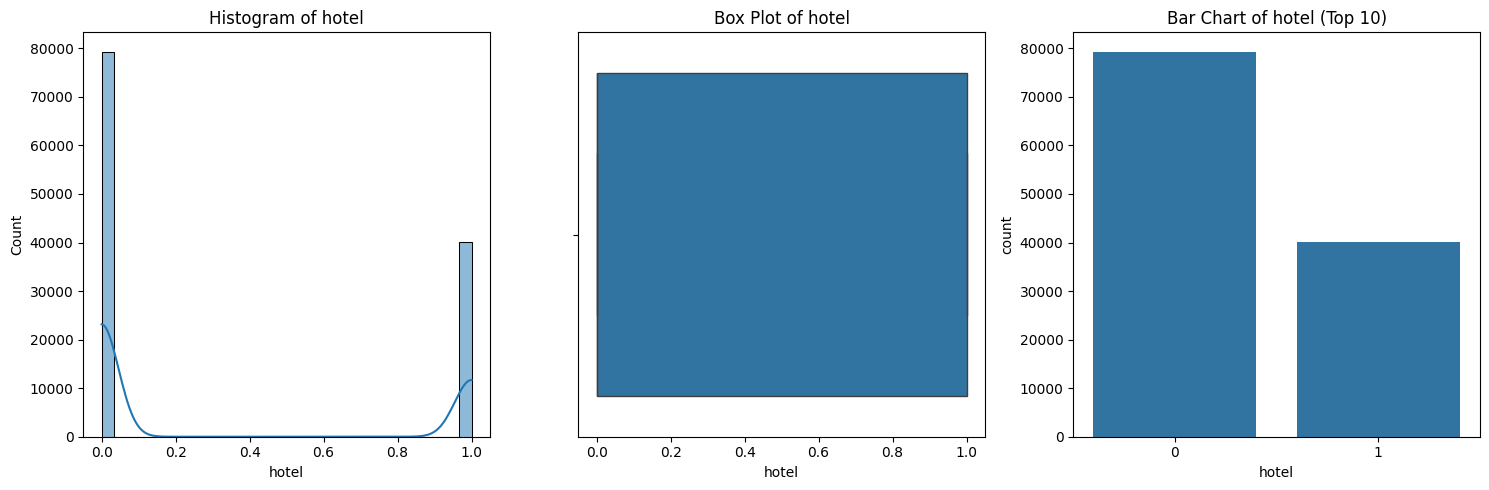

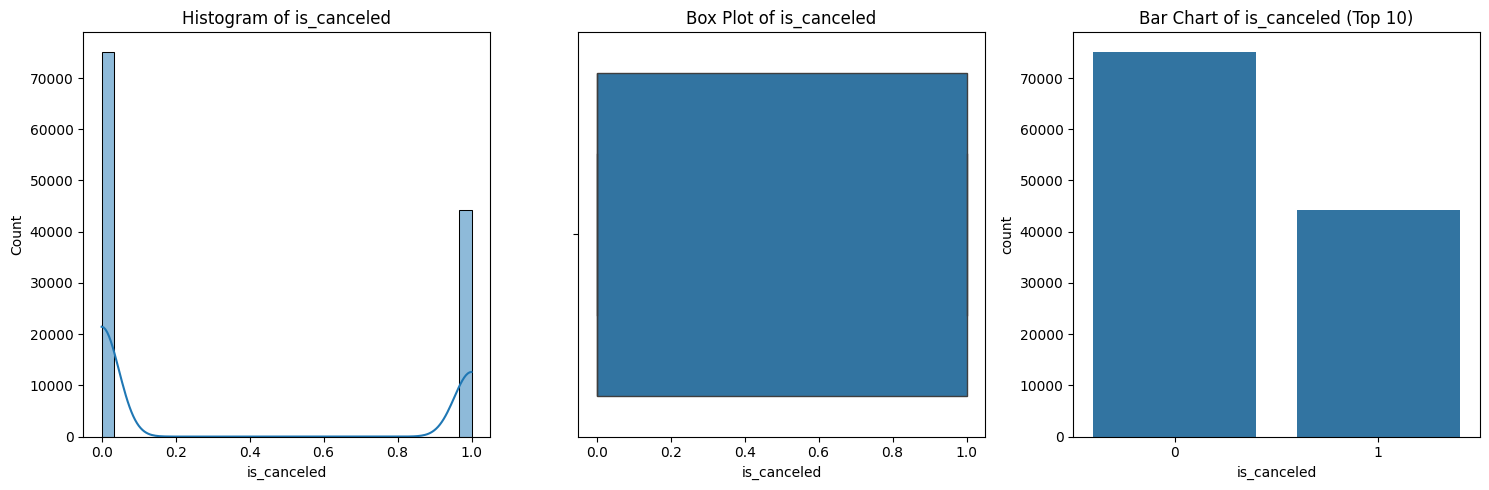

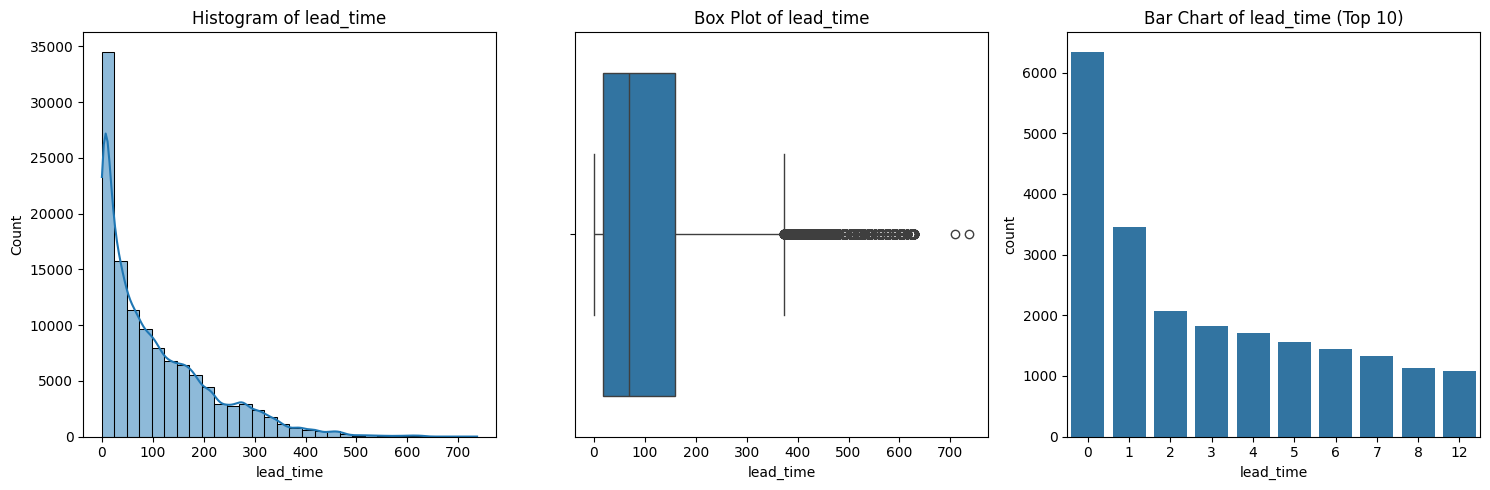

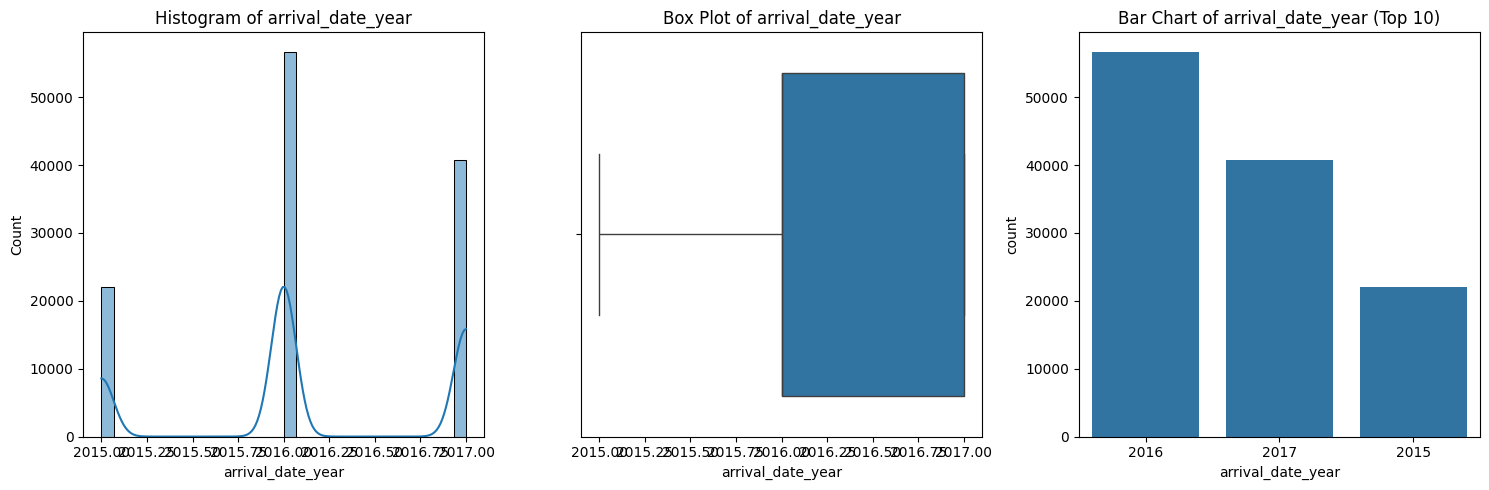

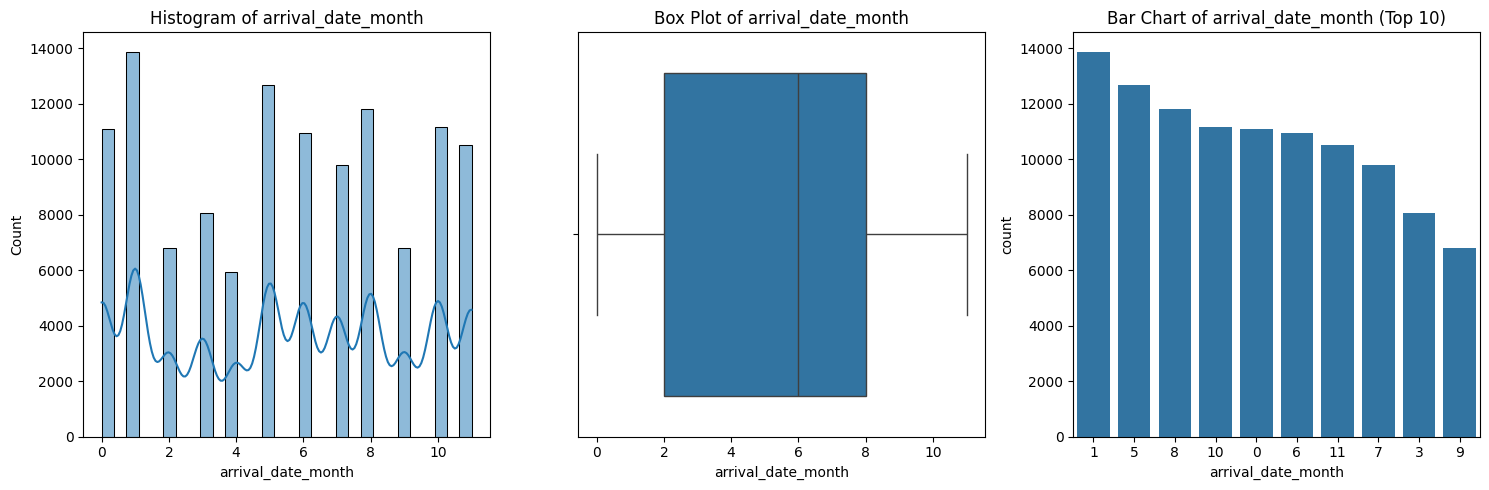

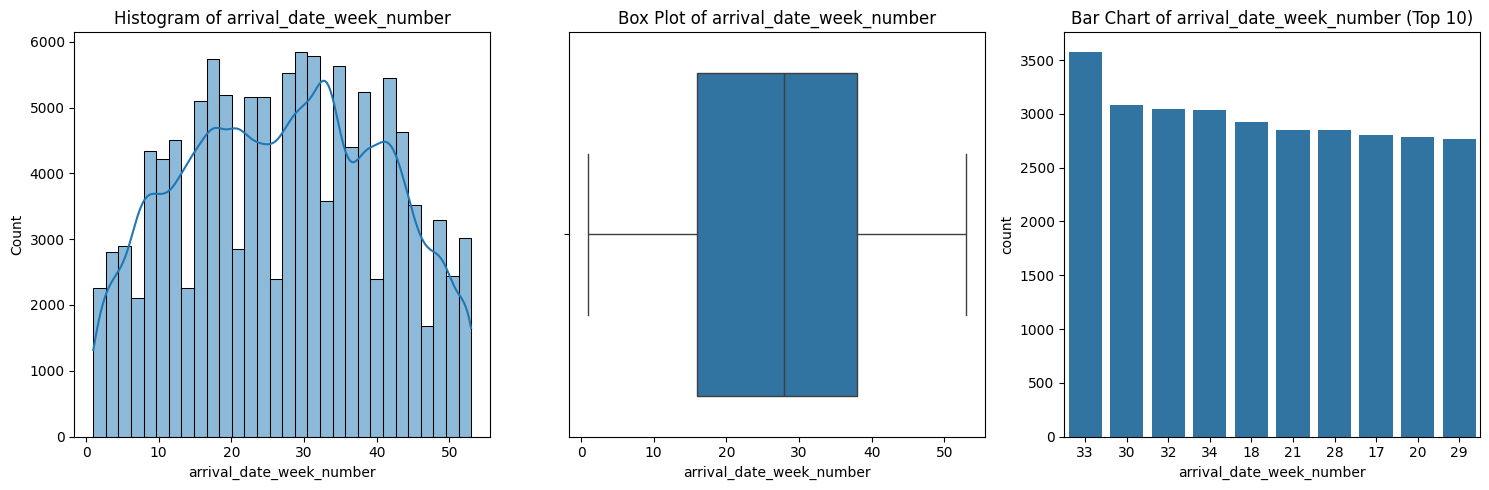

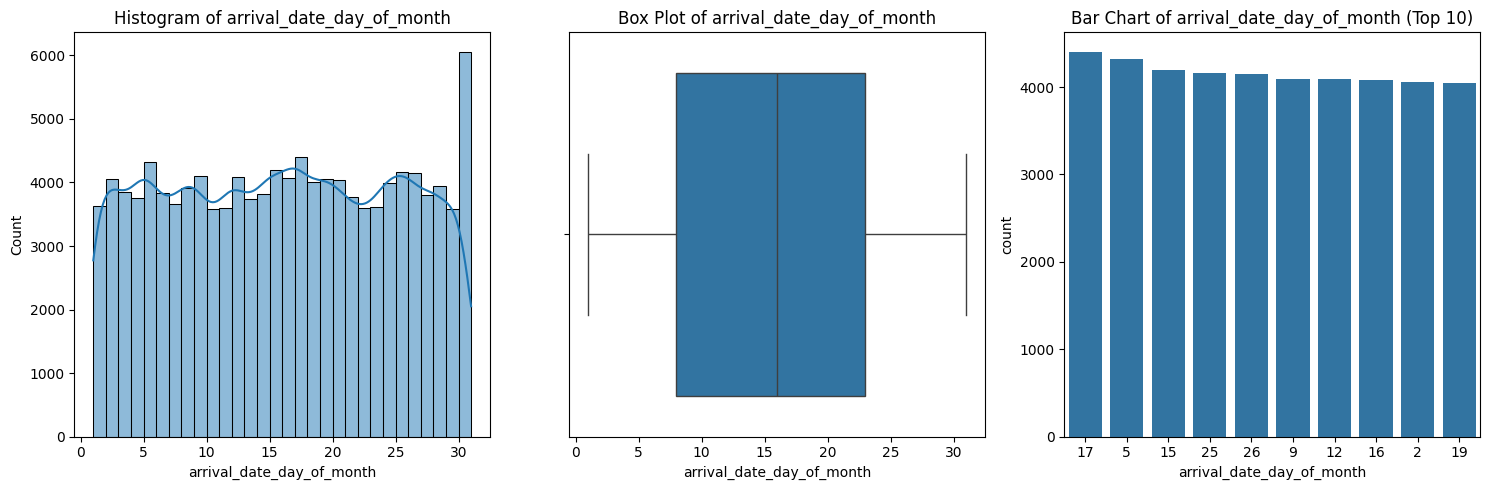

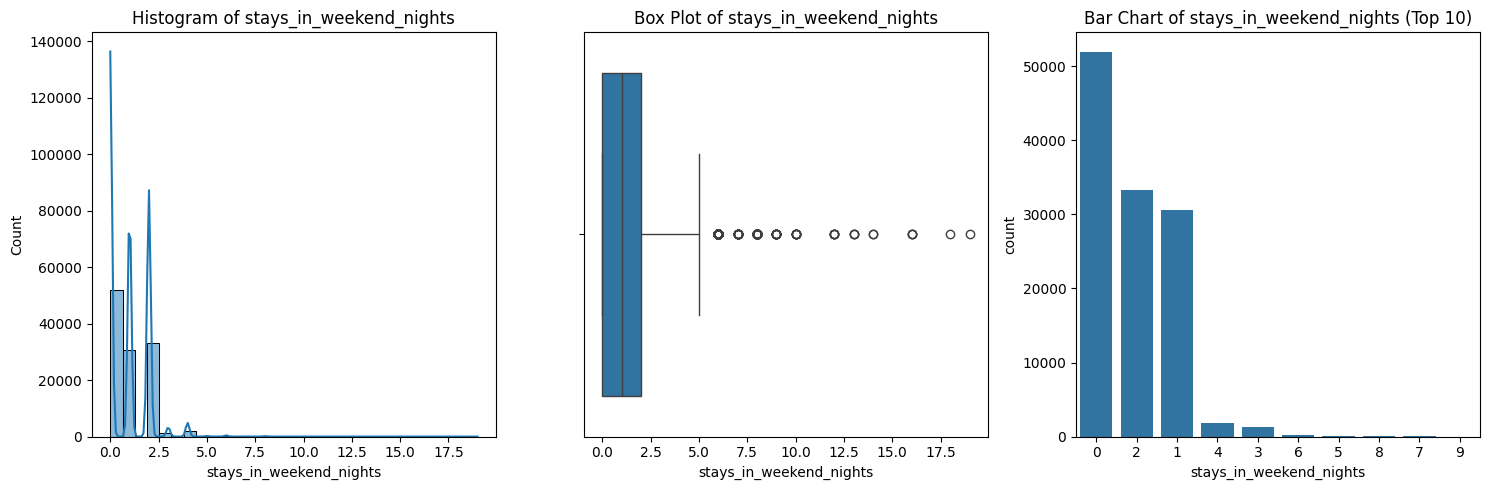

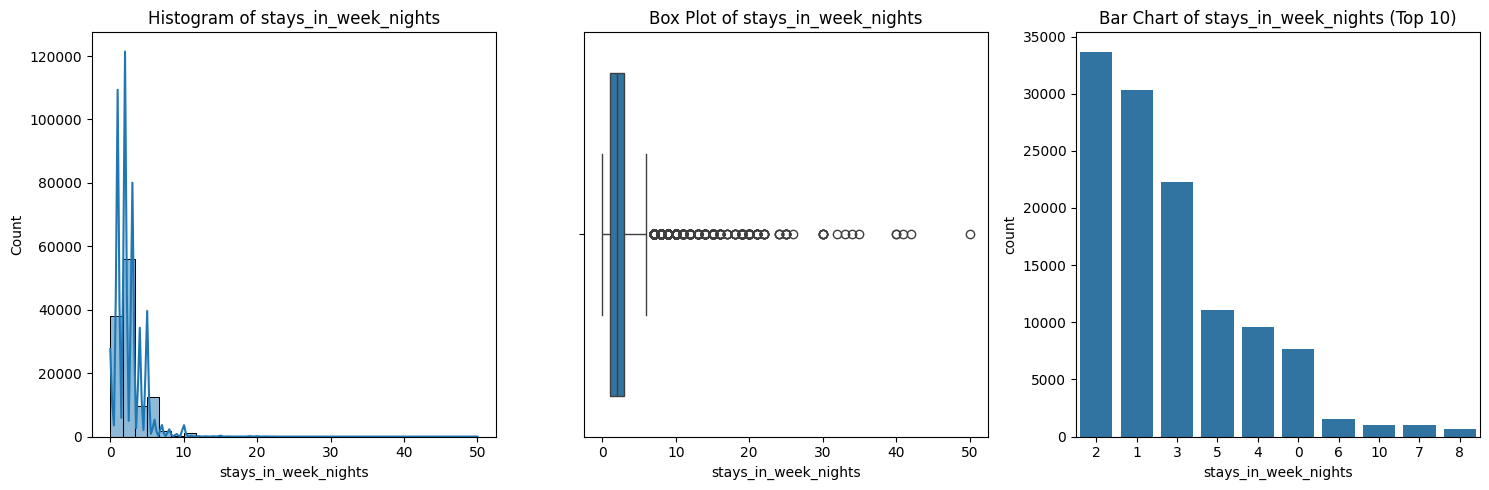

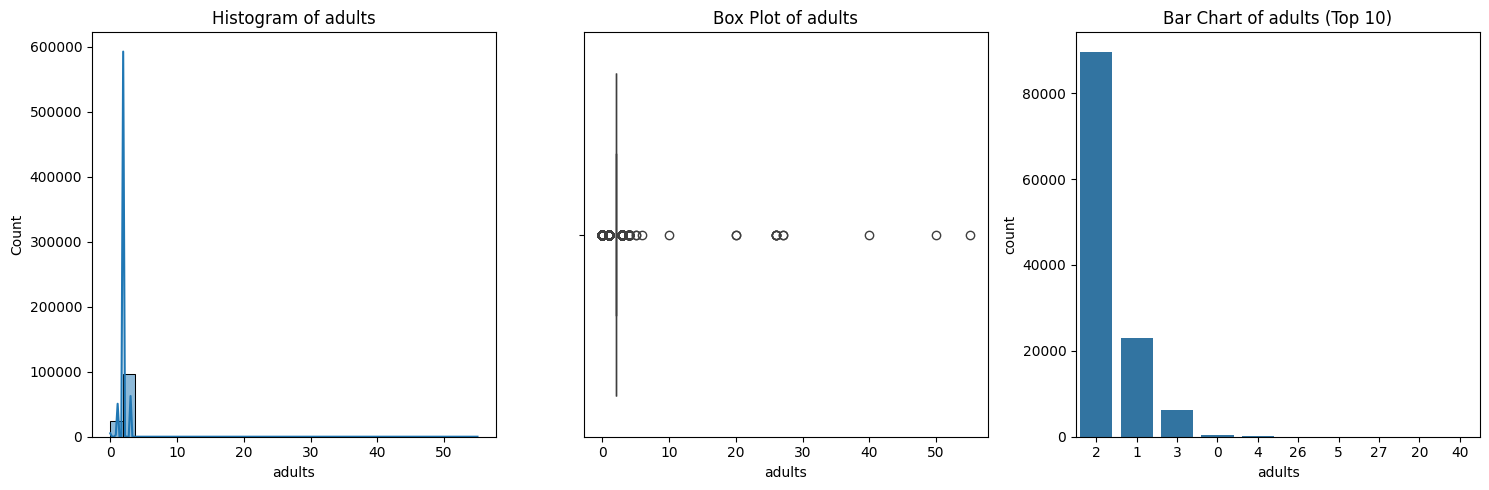

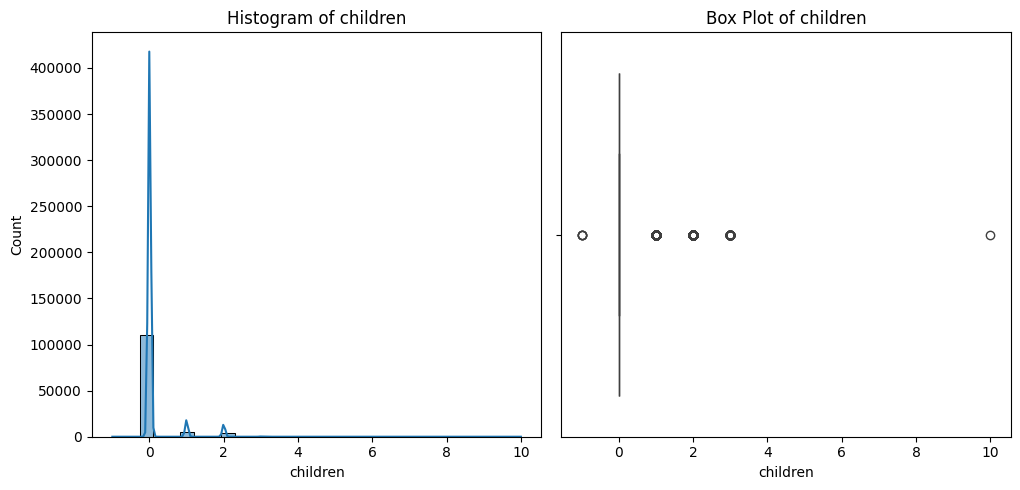

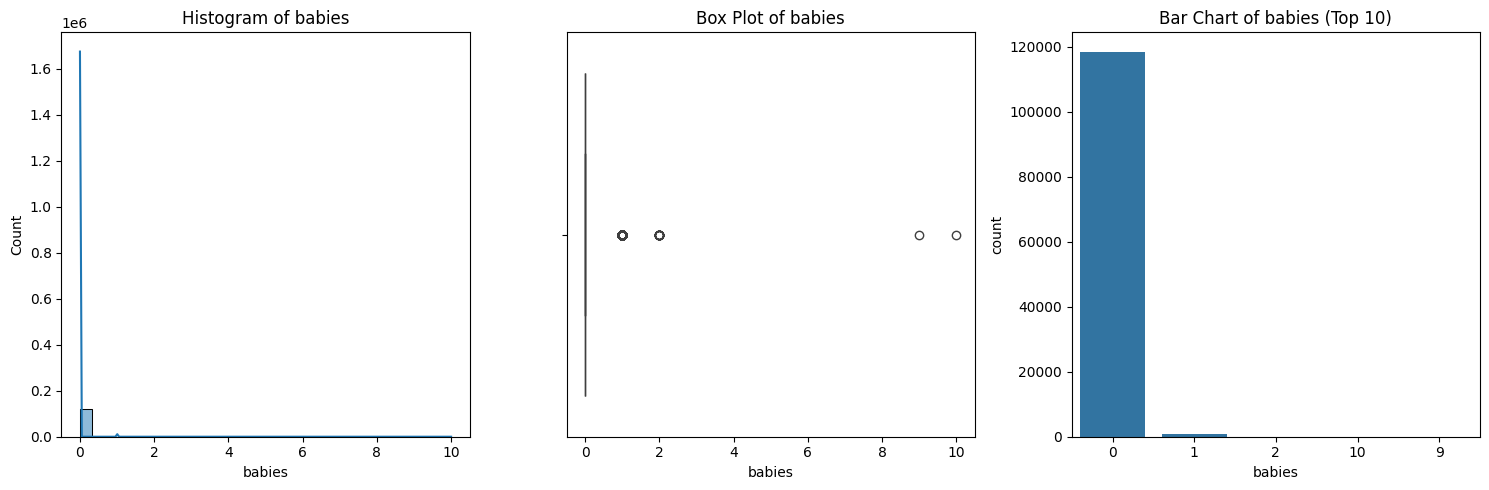

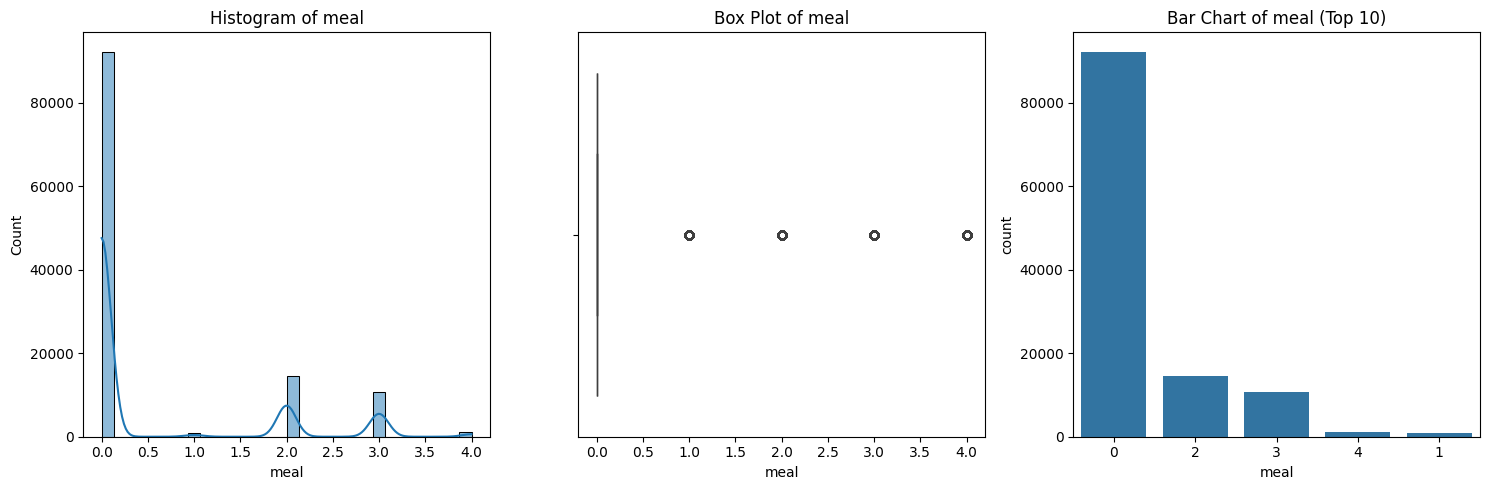

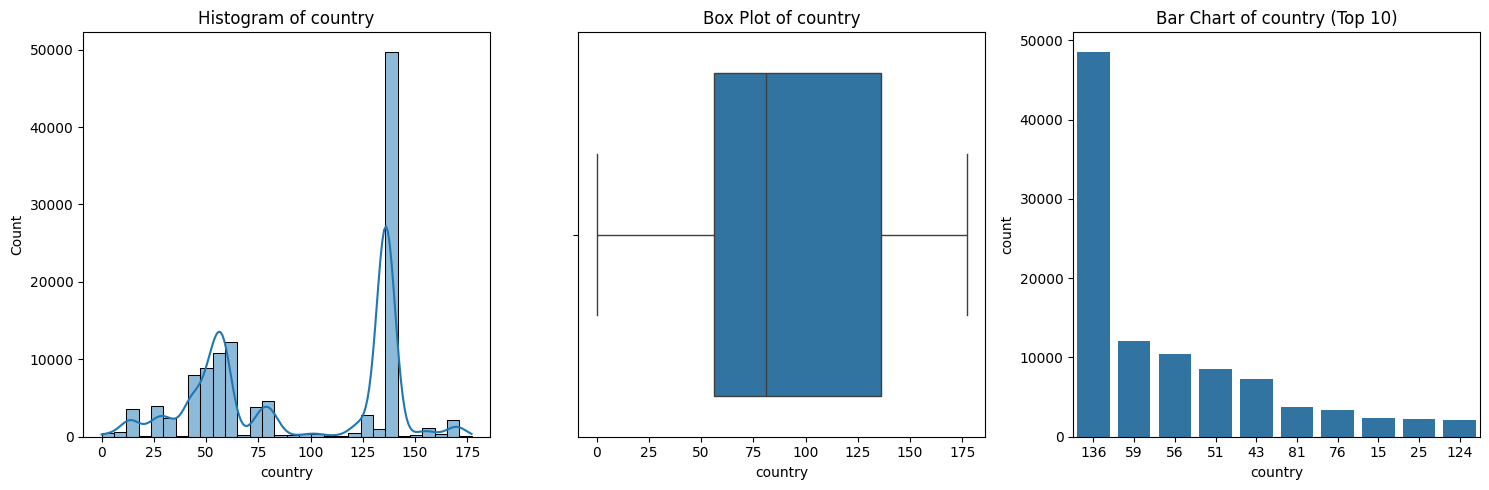

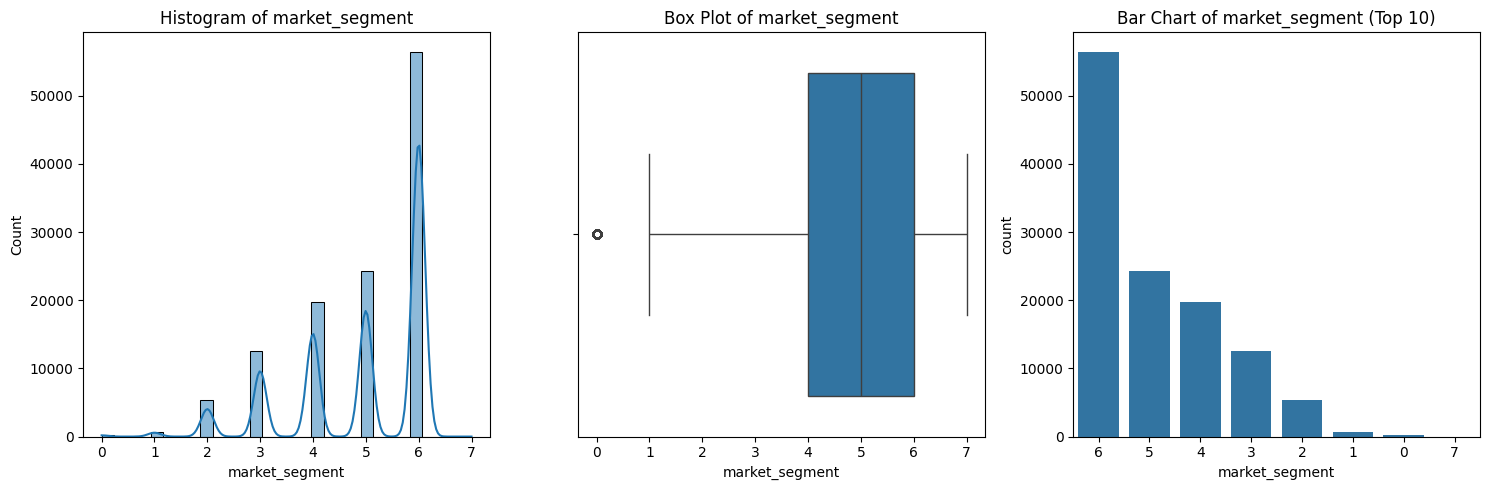

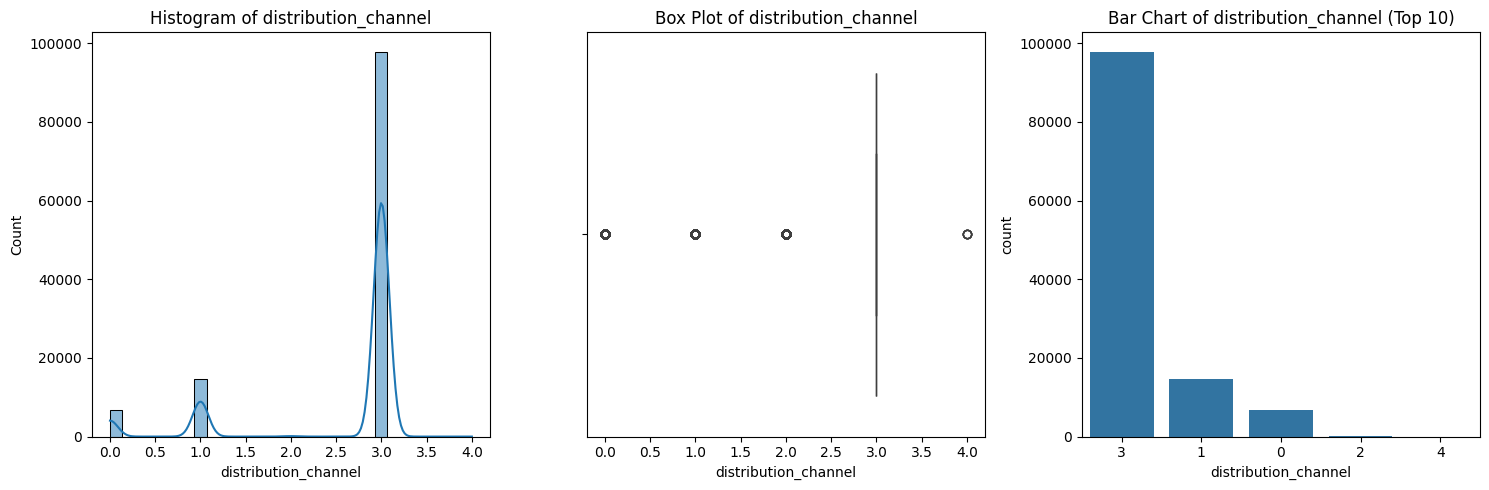

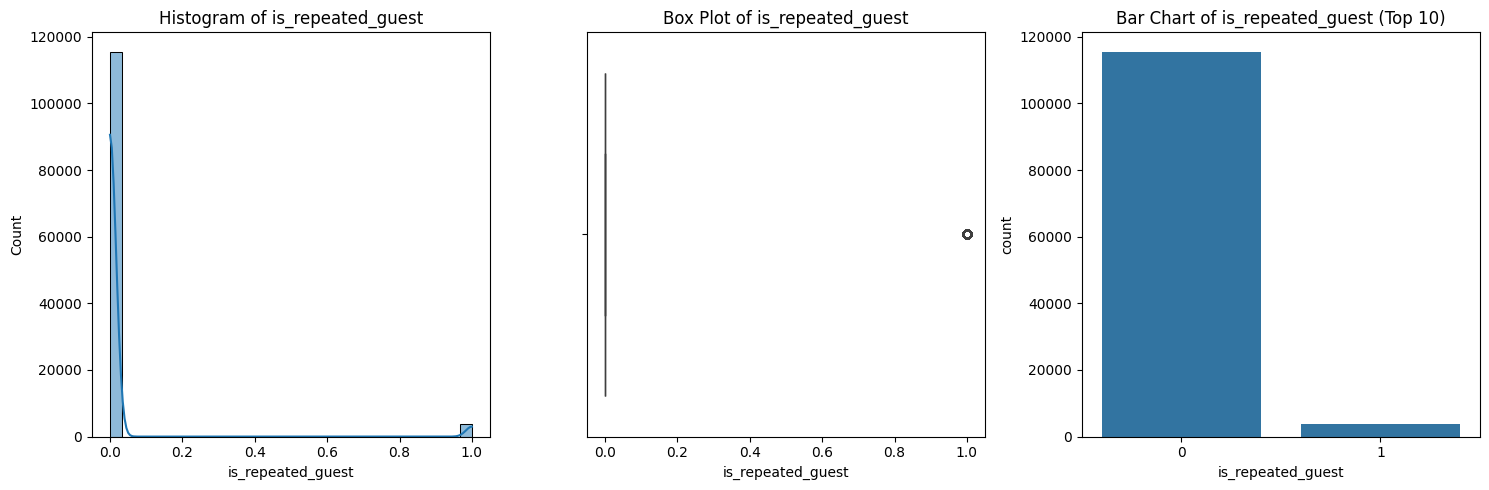

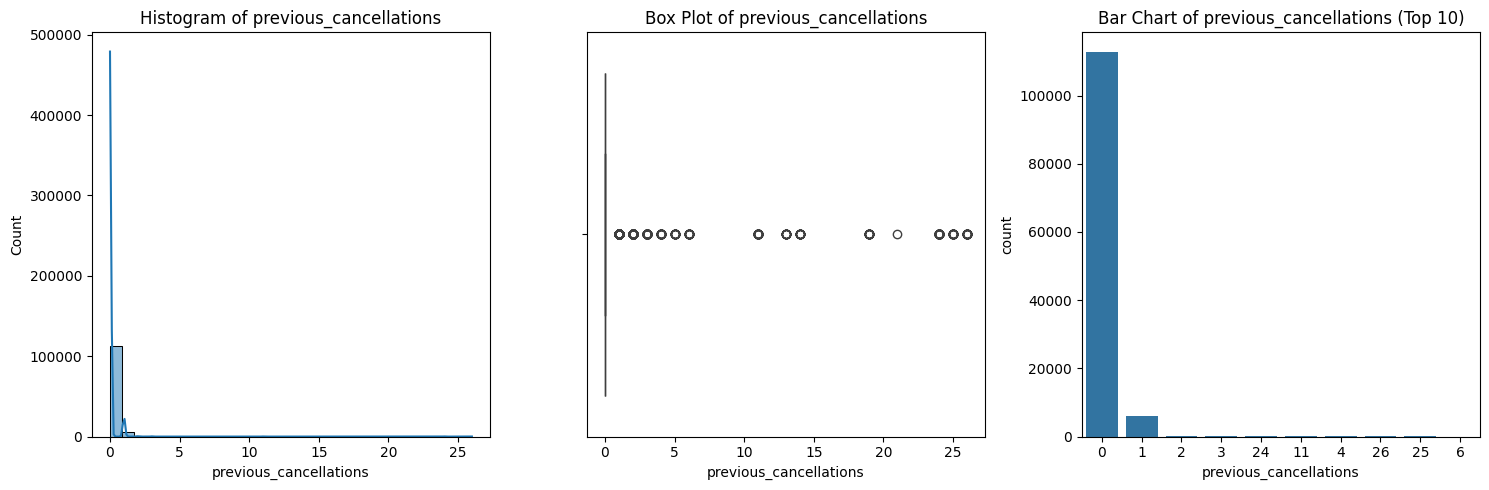

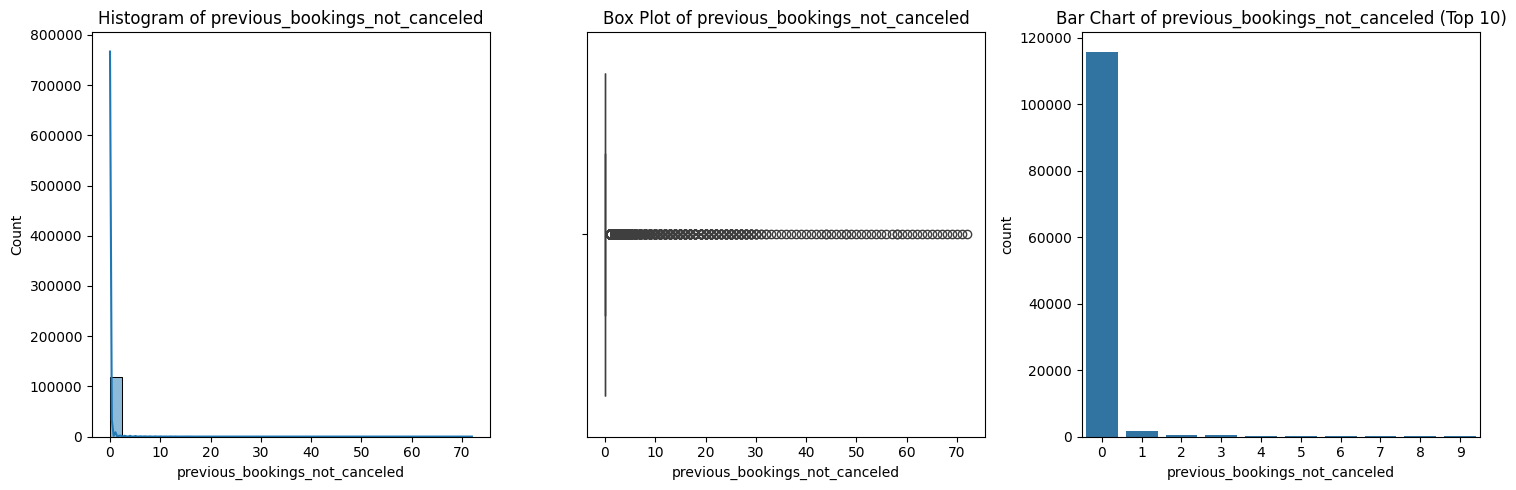

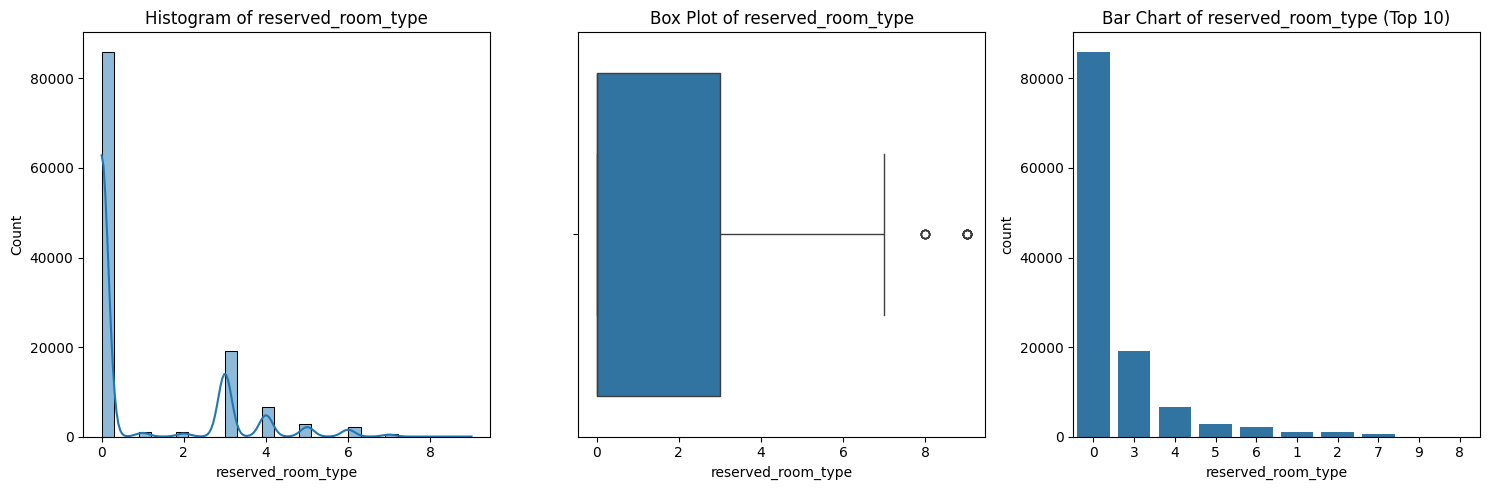

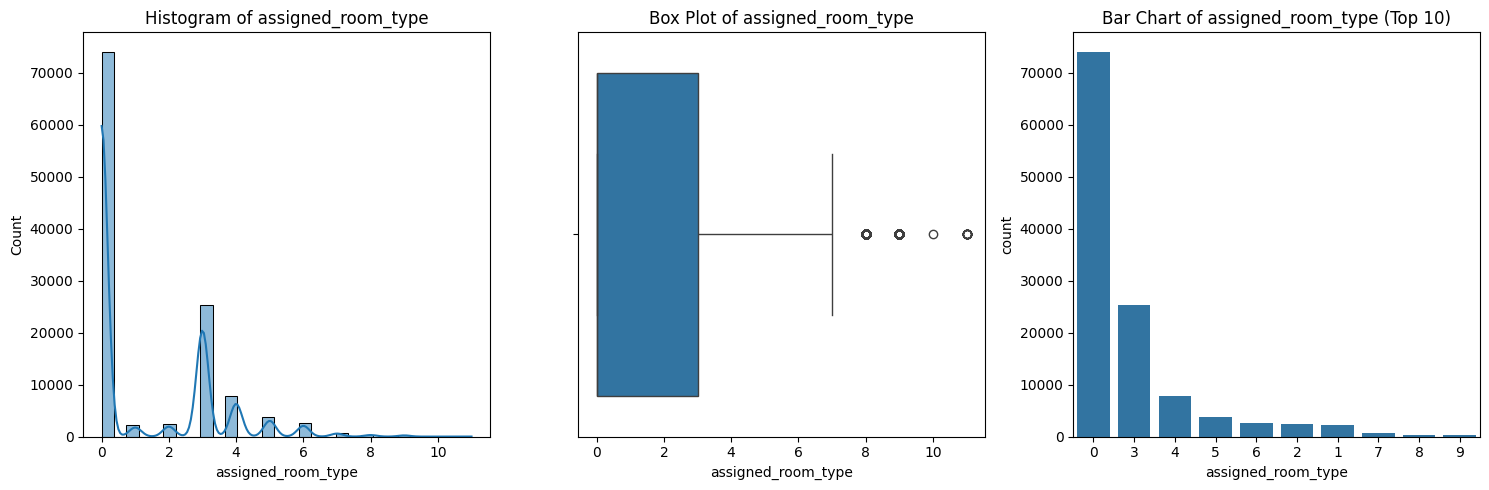

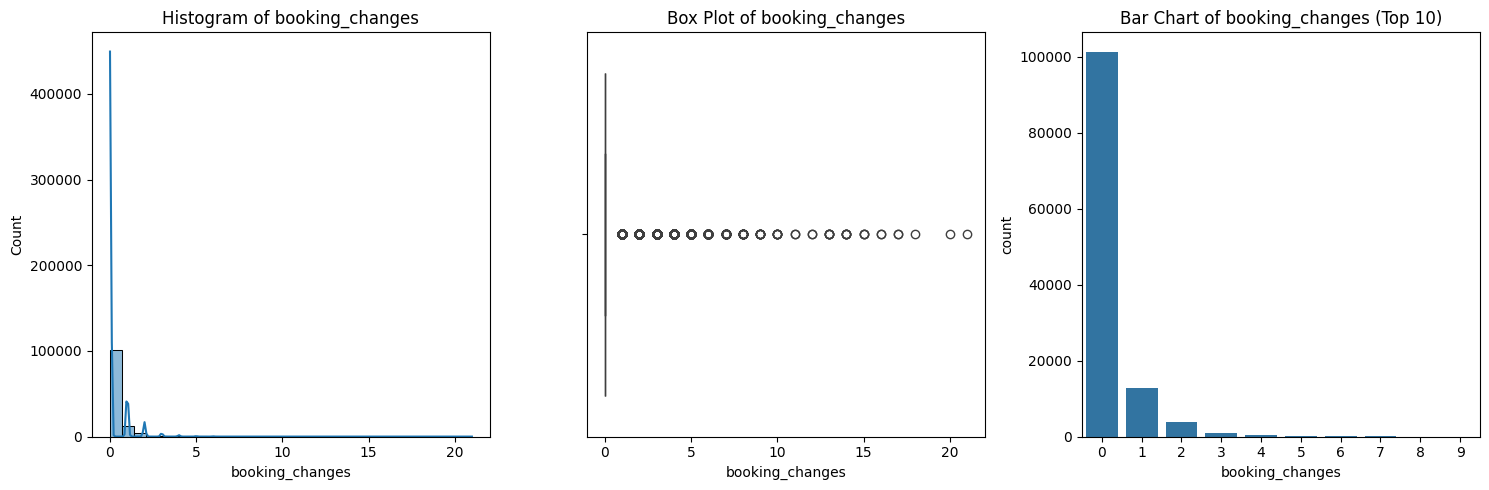

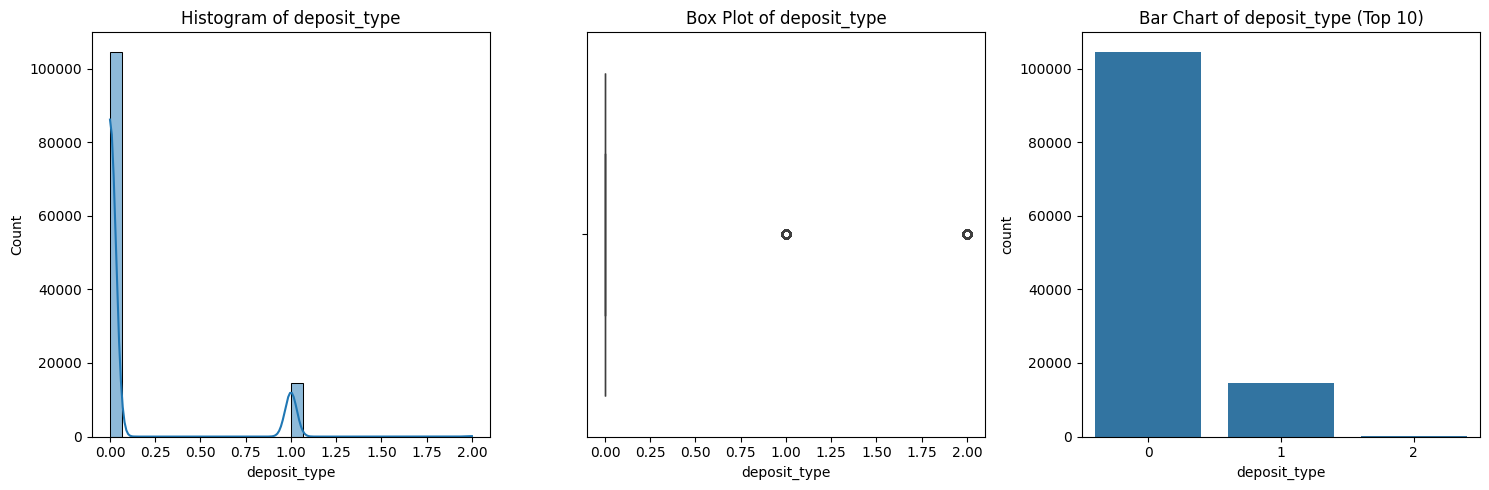

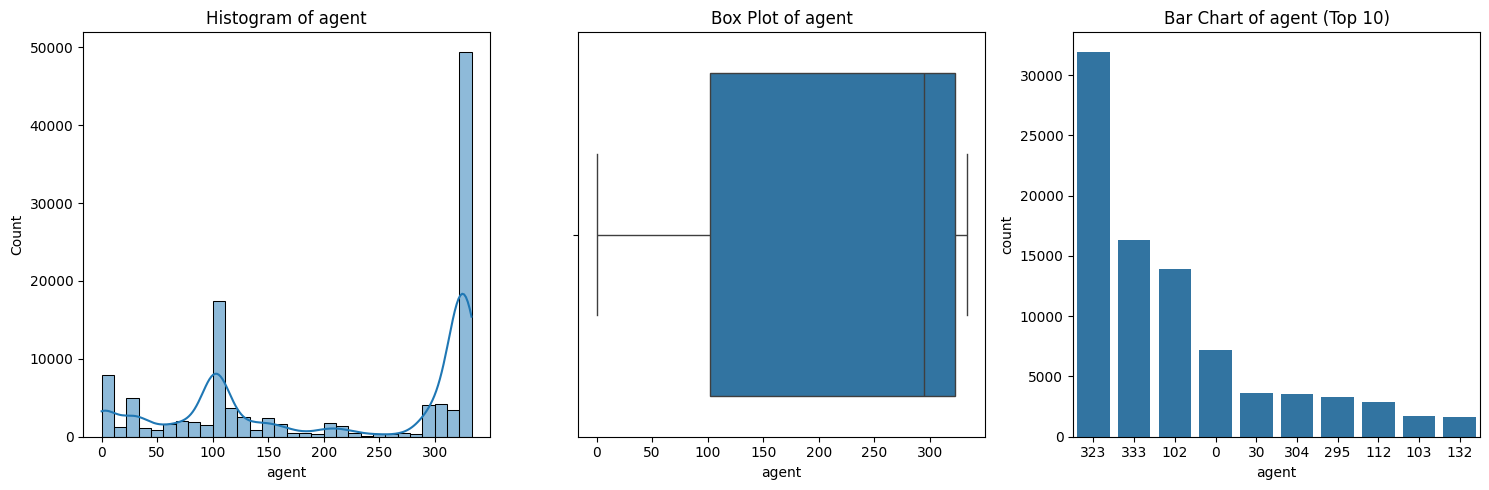

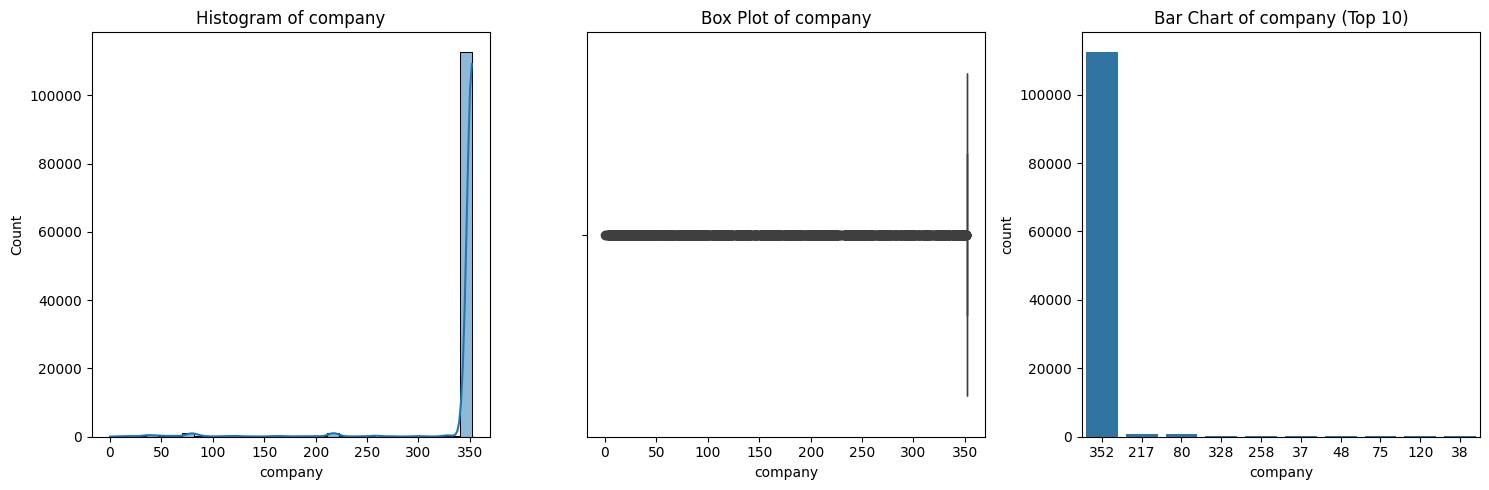

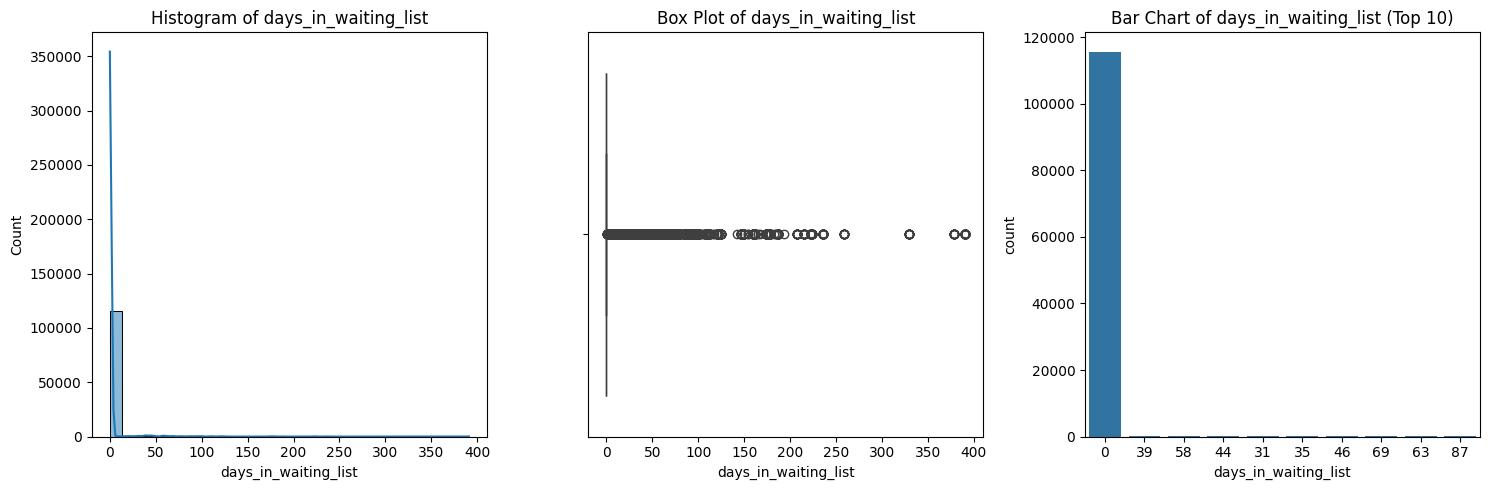

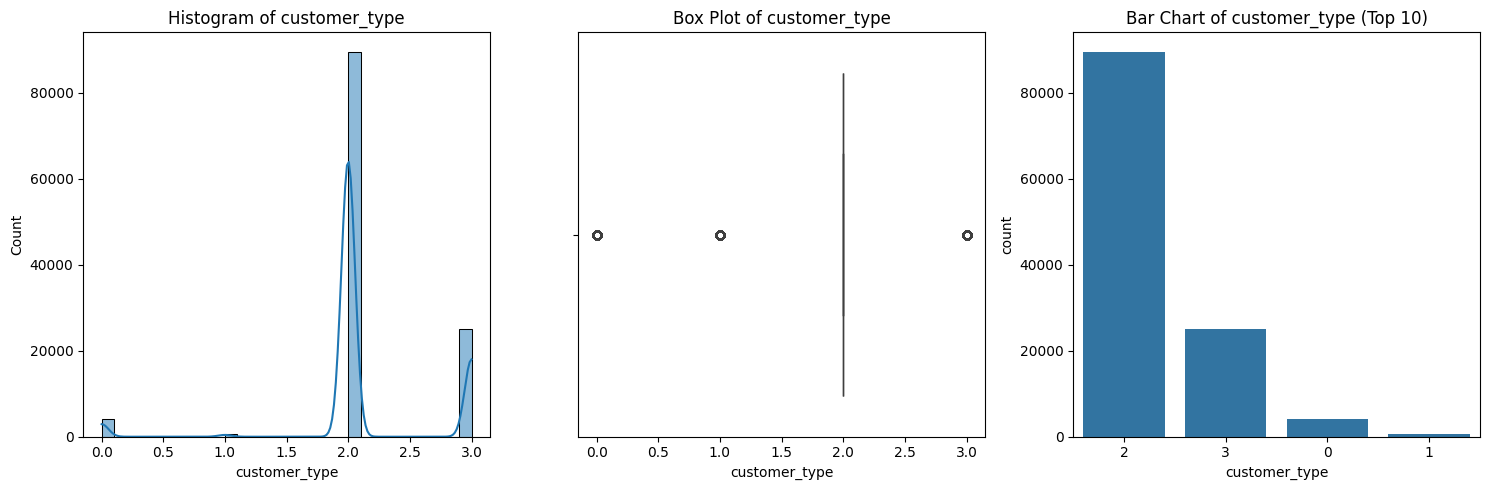

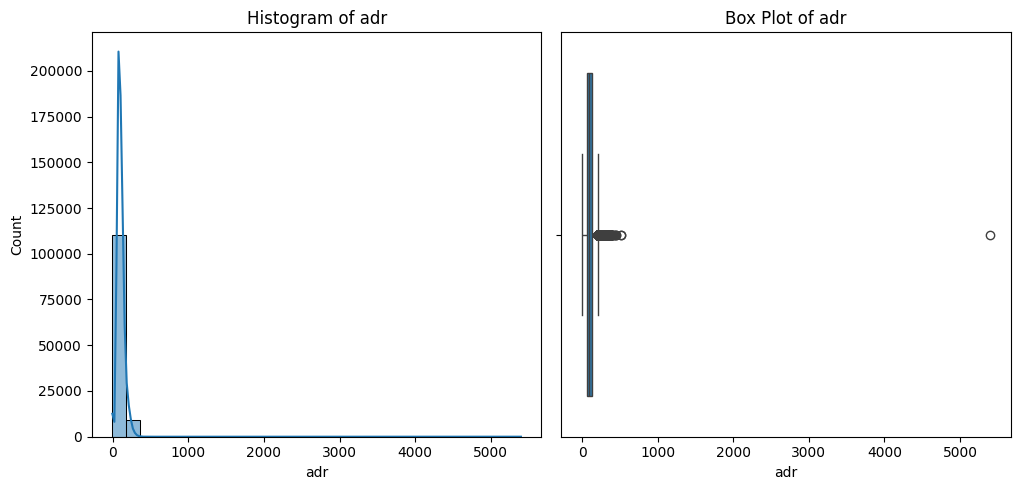

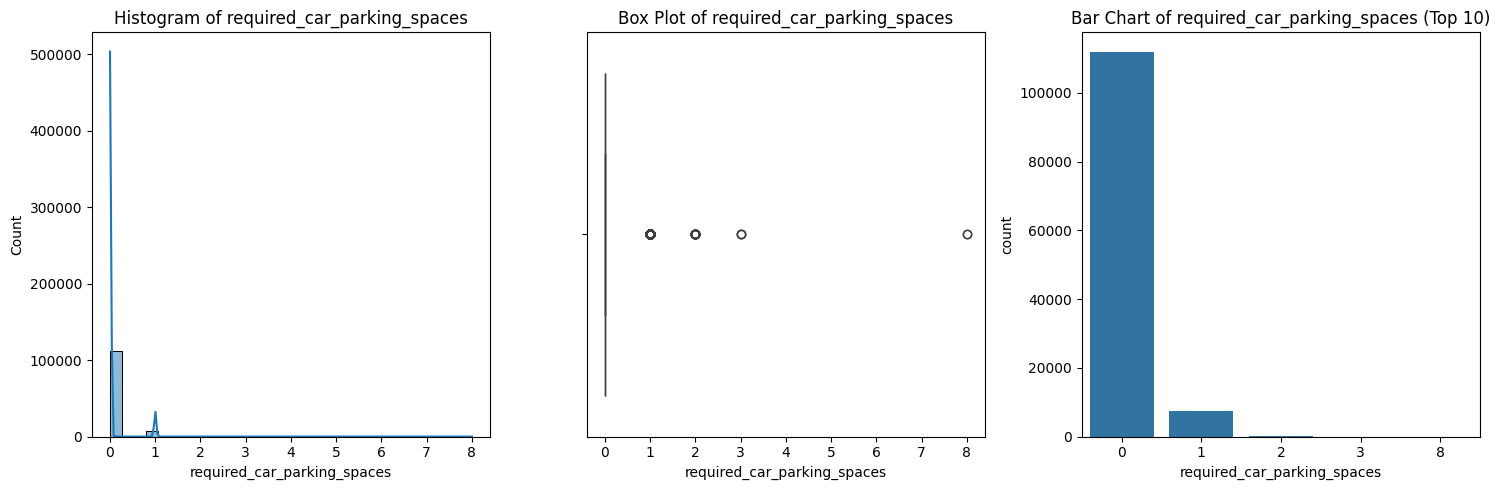

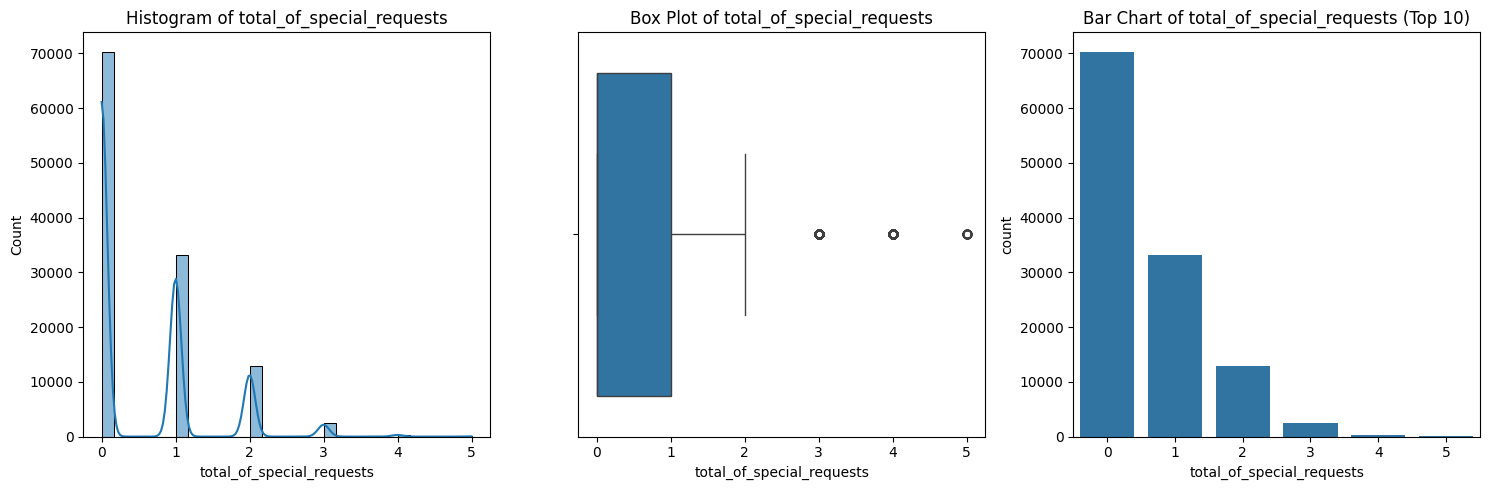

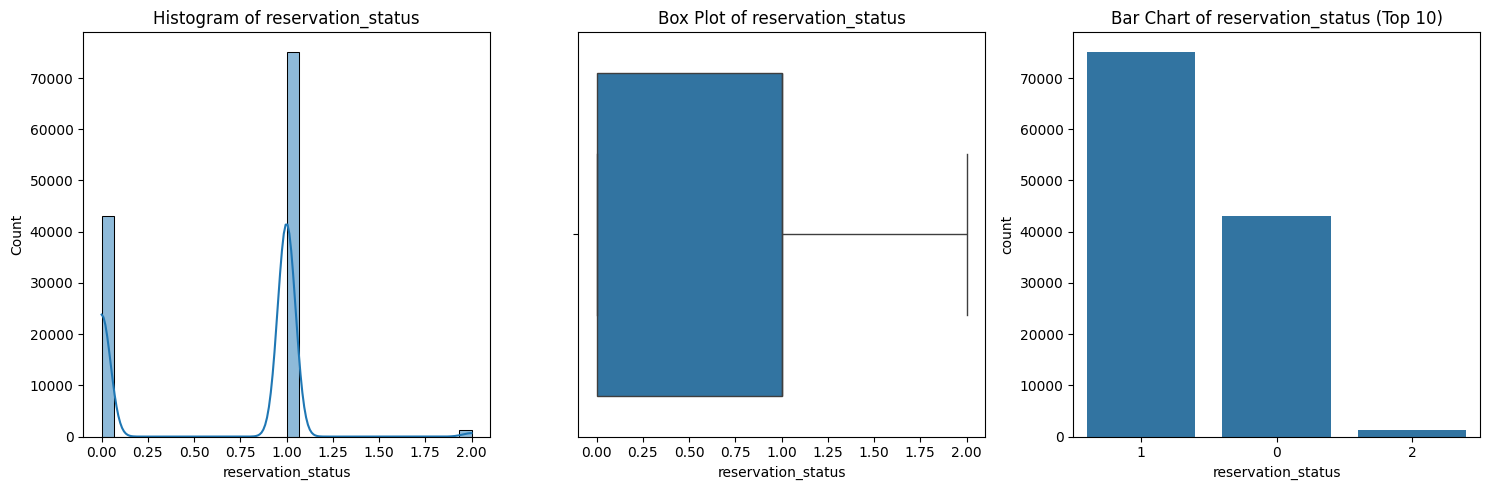

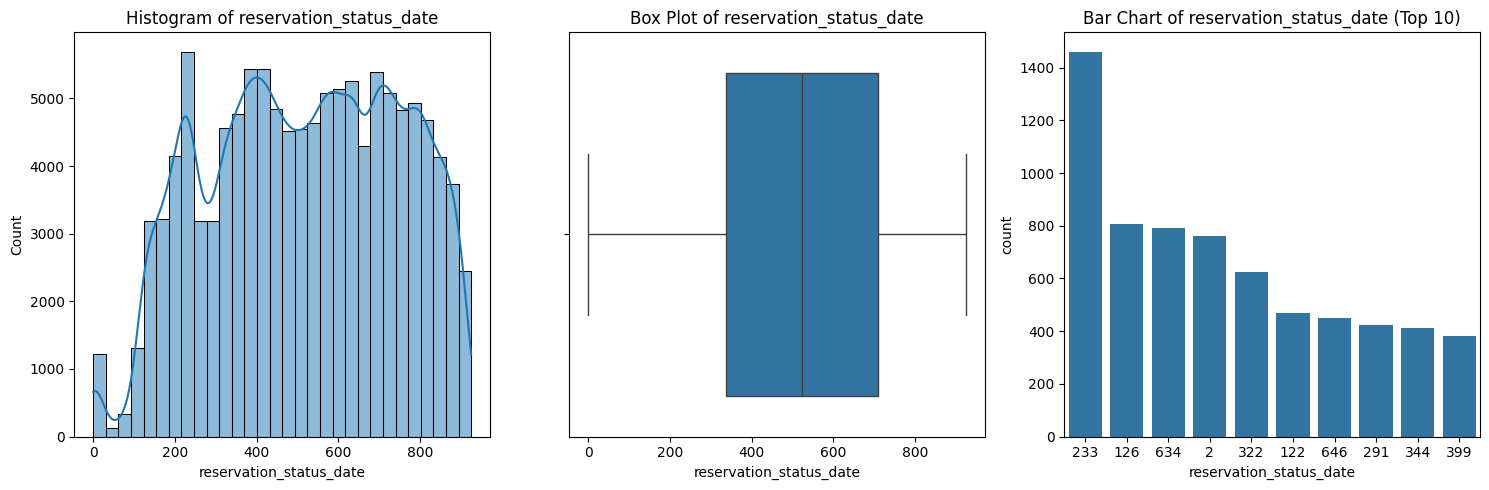

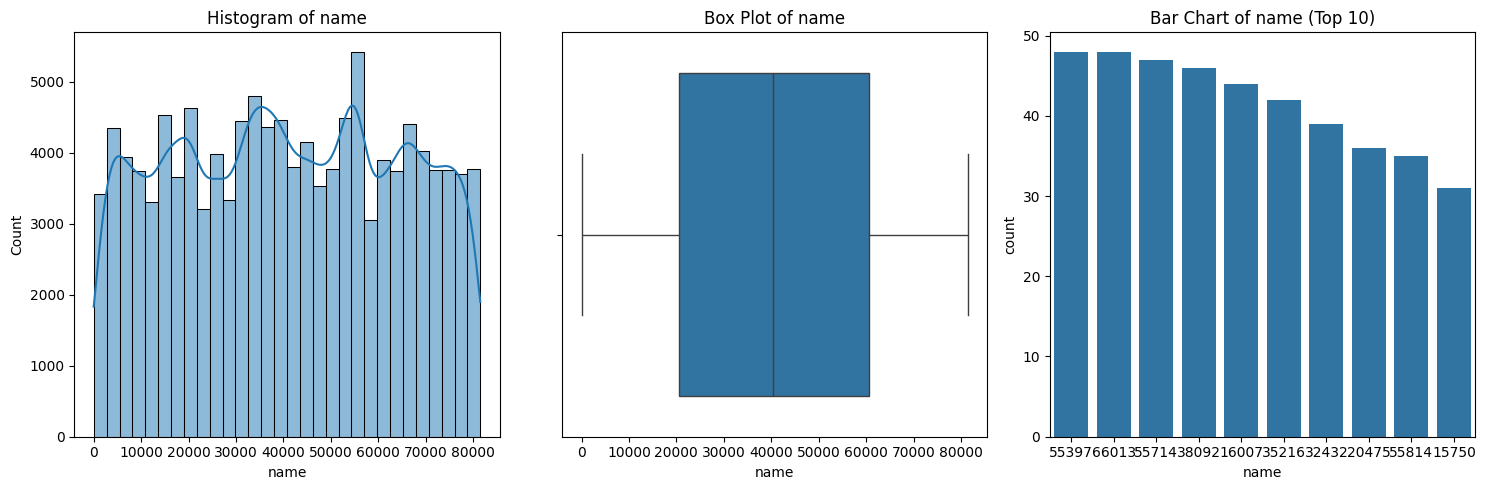

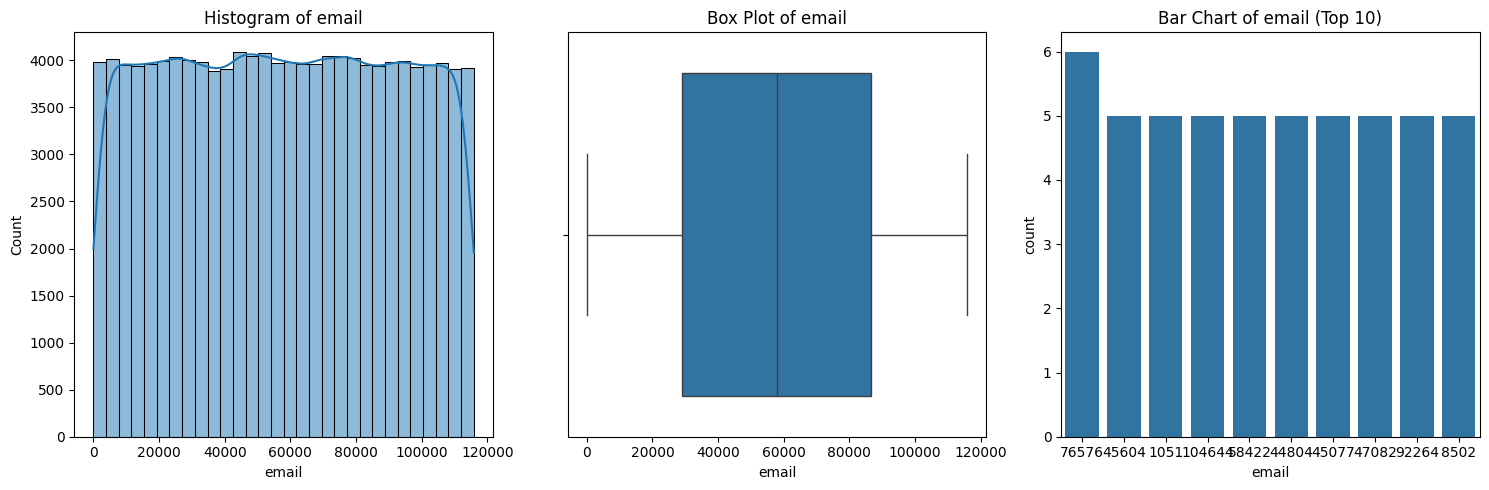

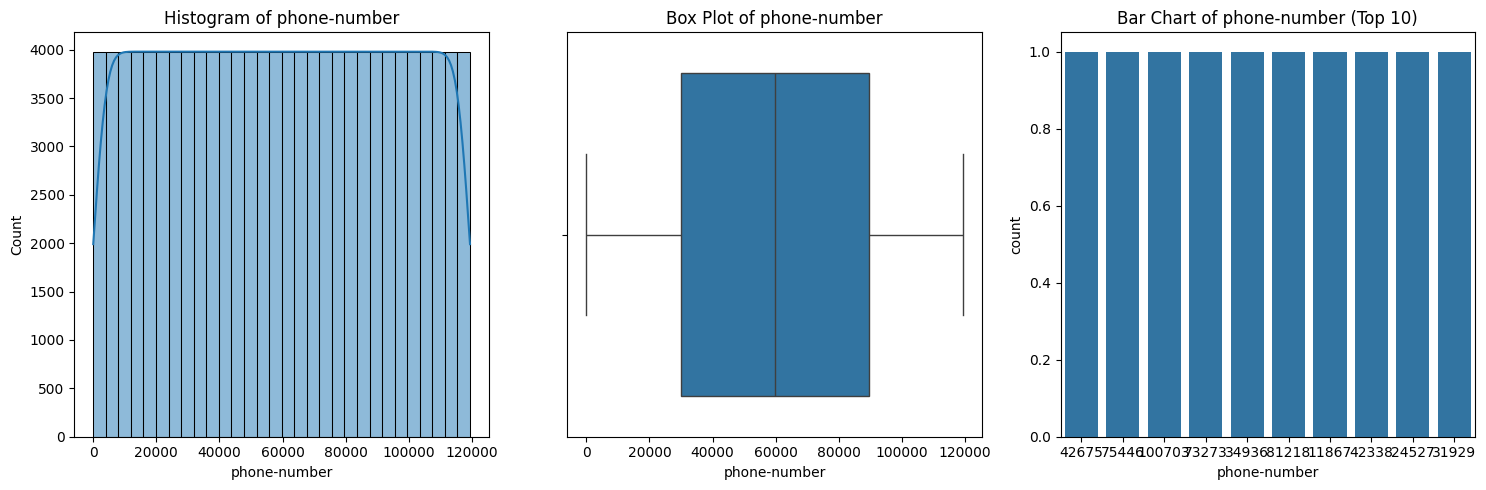

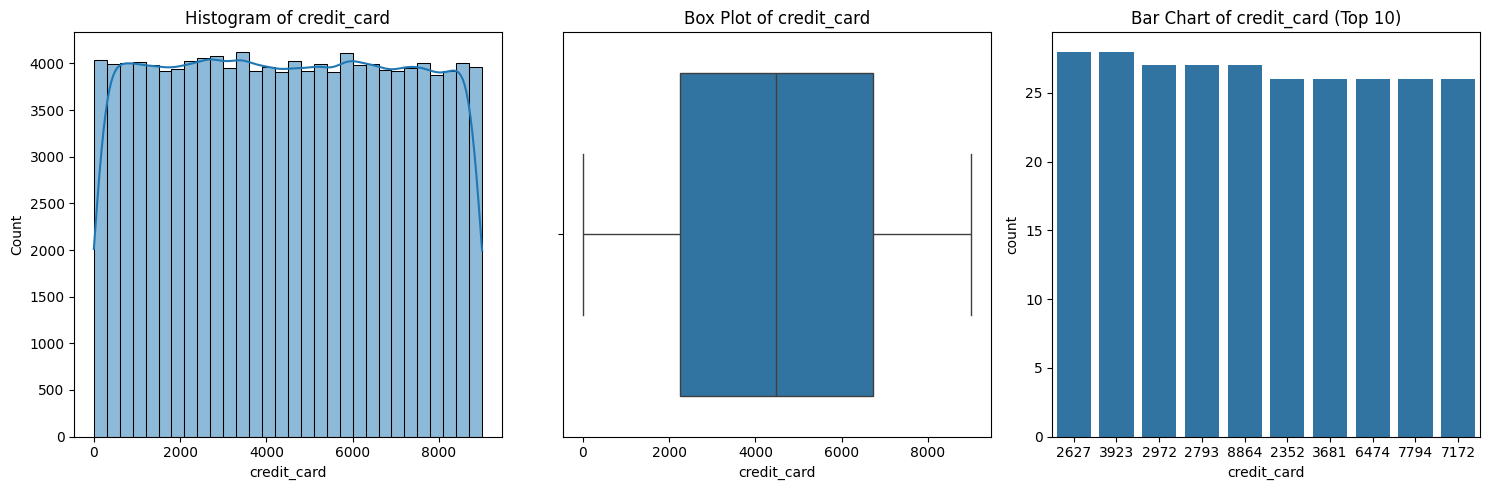

In [7]:
def univariate_analysis(data, column_name):
    describe= data[column_name].describe()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    frequency_distribution = data[column_name].value_counts().head(10)

     # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

   
    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')


    plt.tight_layout()
    plt.show()

variables_to_analyse=data.columns
for varible in variables_to_analyse:
    univariate_analysis(data, varible)


C:\Users\Vasco\AppData\Local\Temp\ipykernel_22060\694410418.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


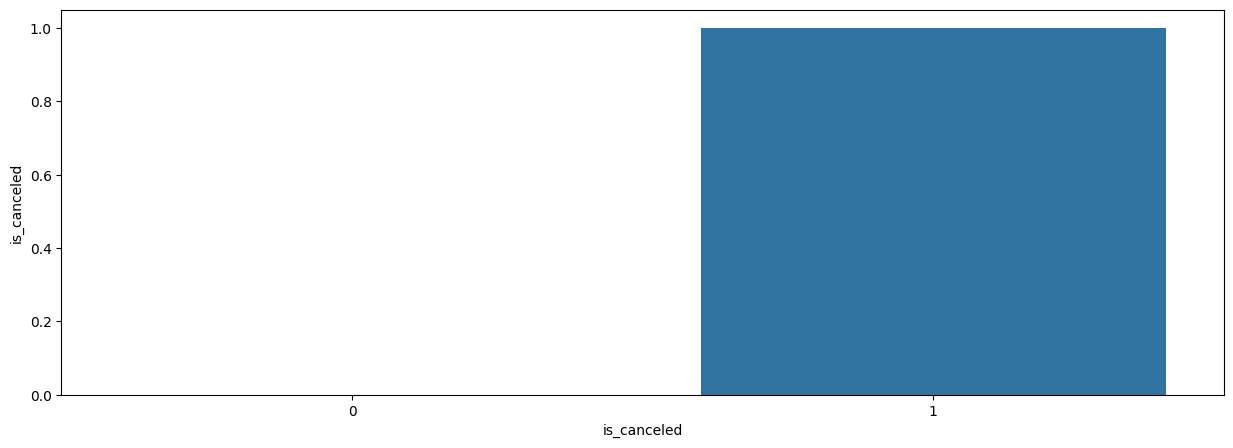

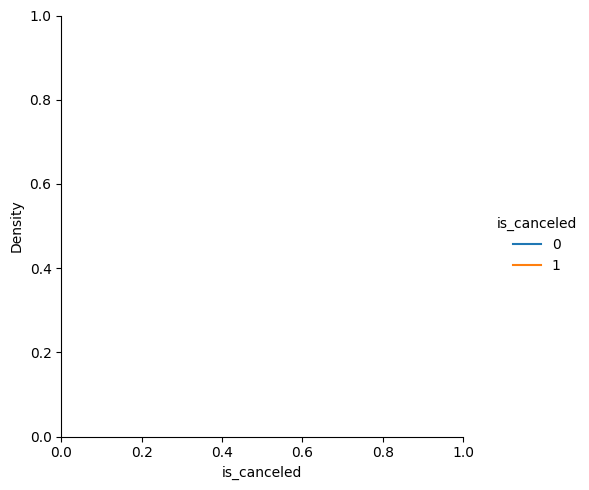

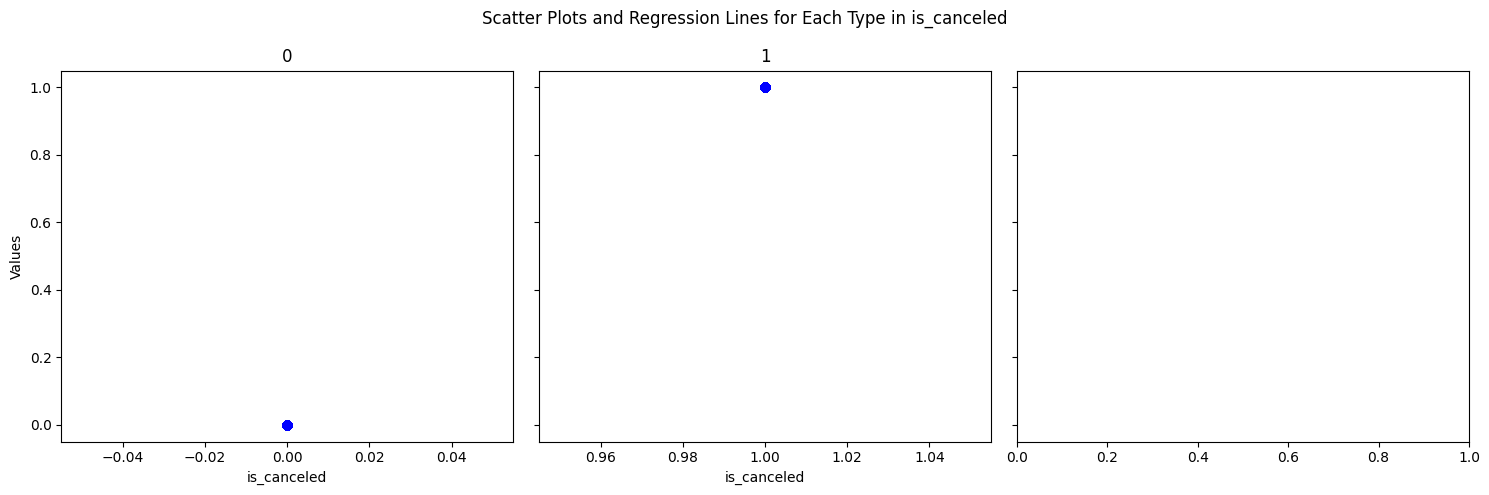

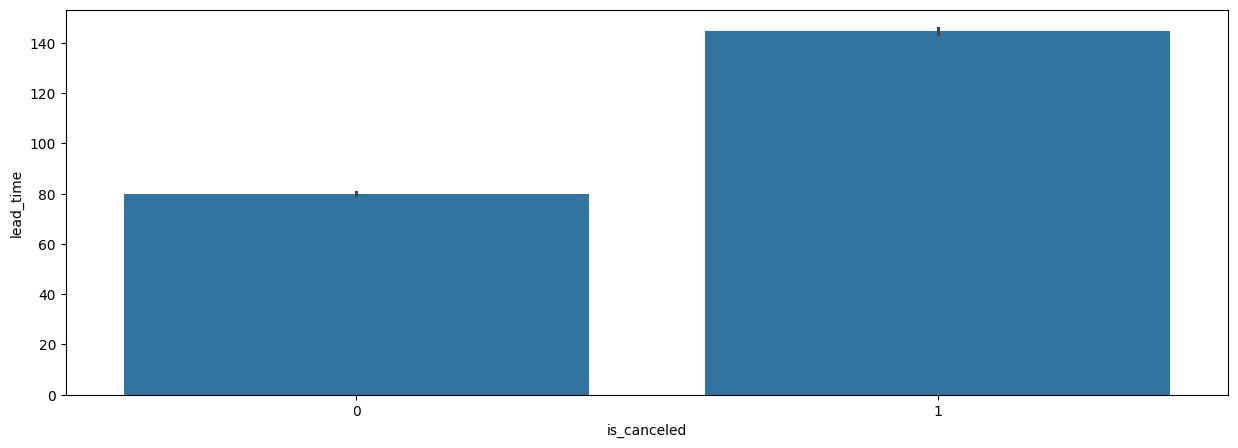

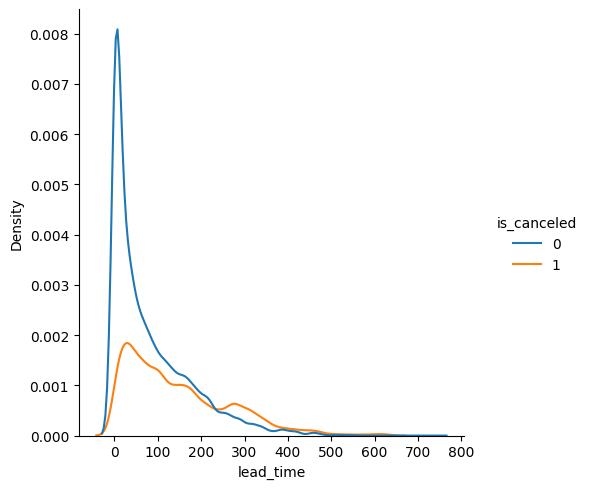

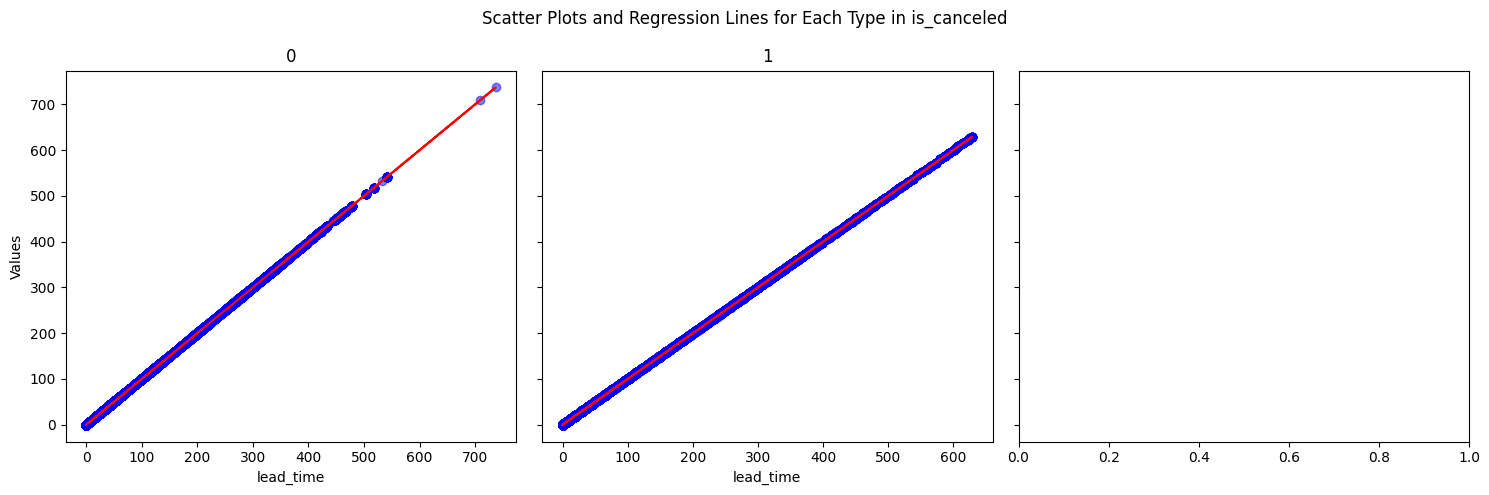

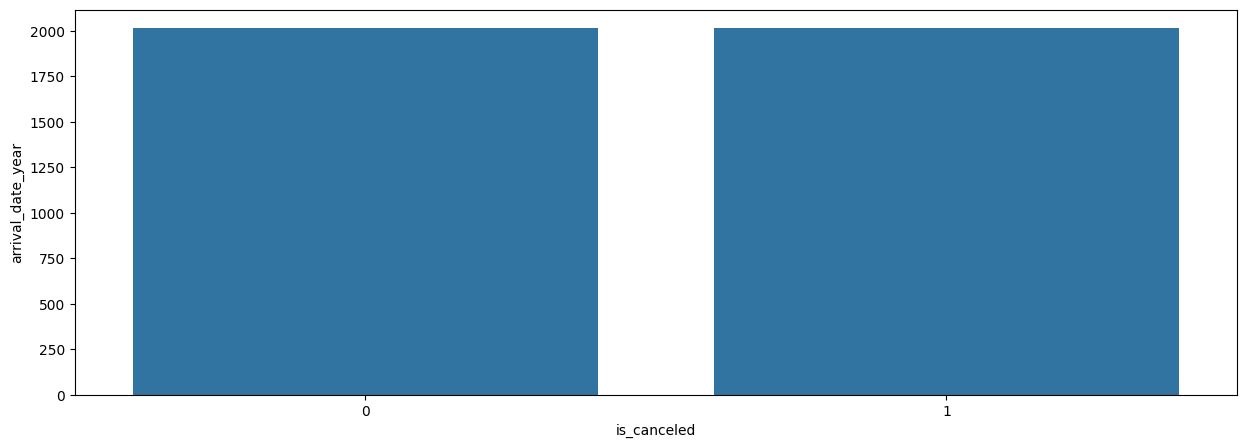

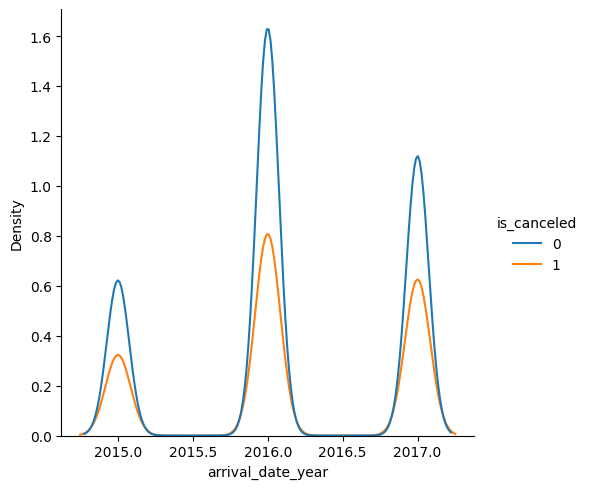

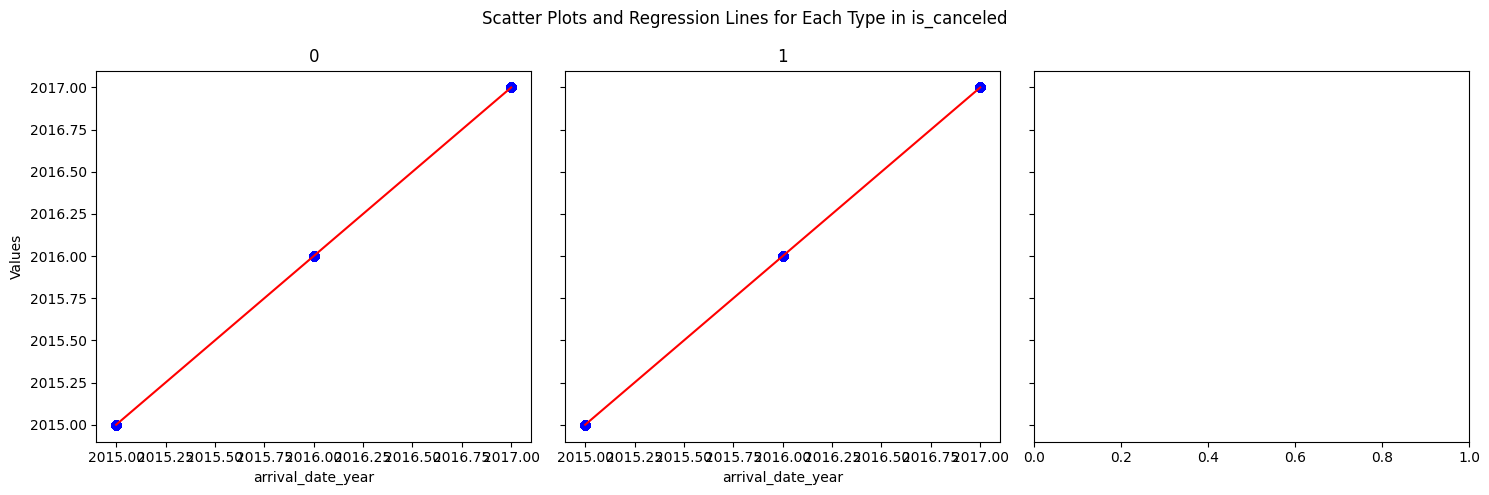

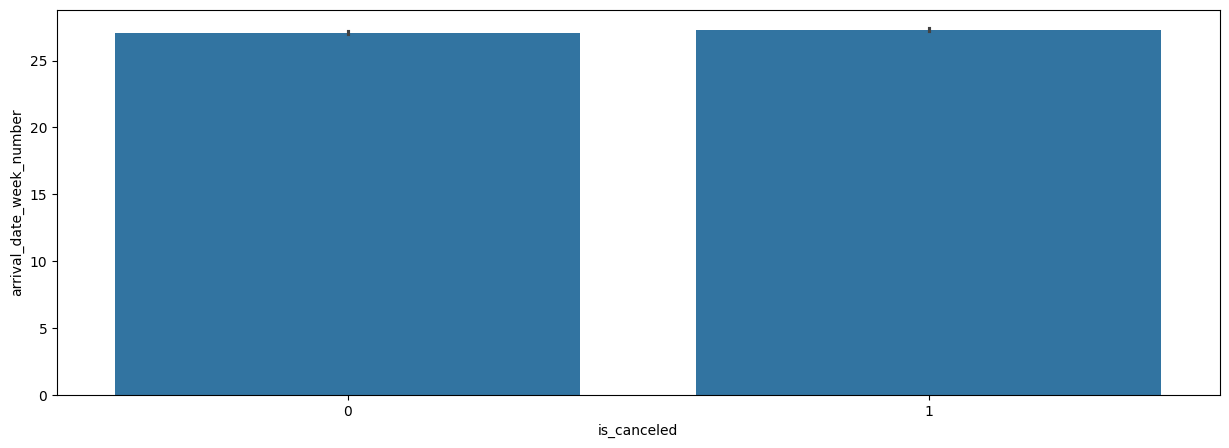

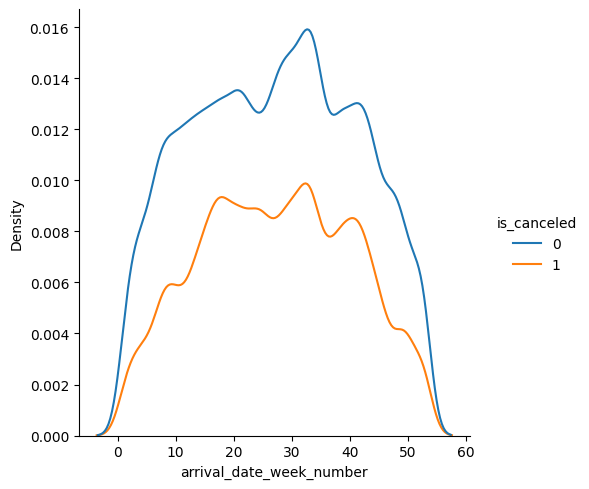

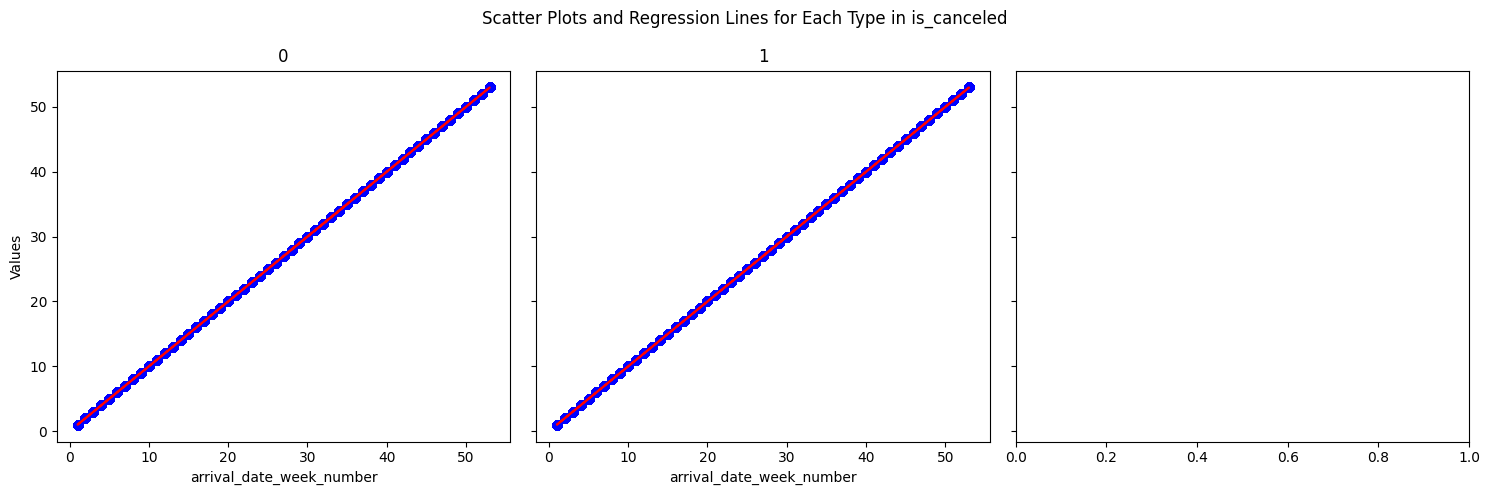

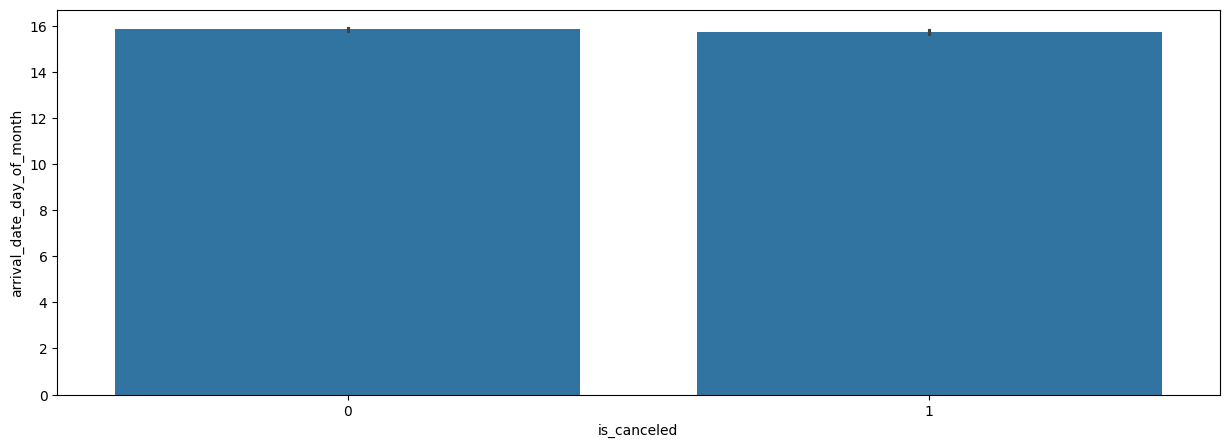

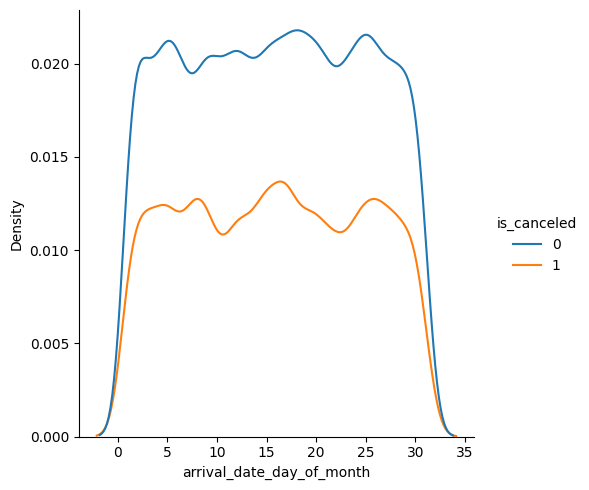

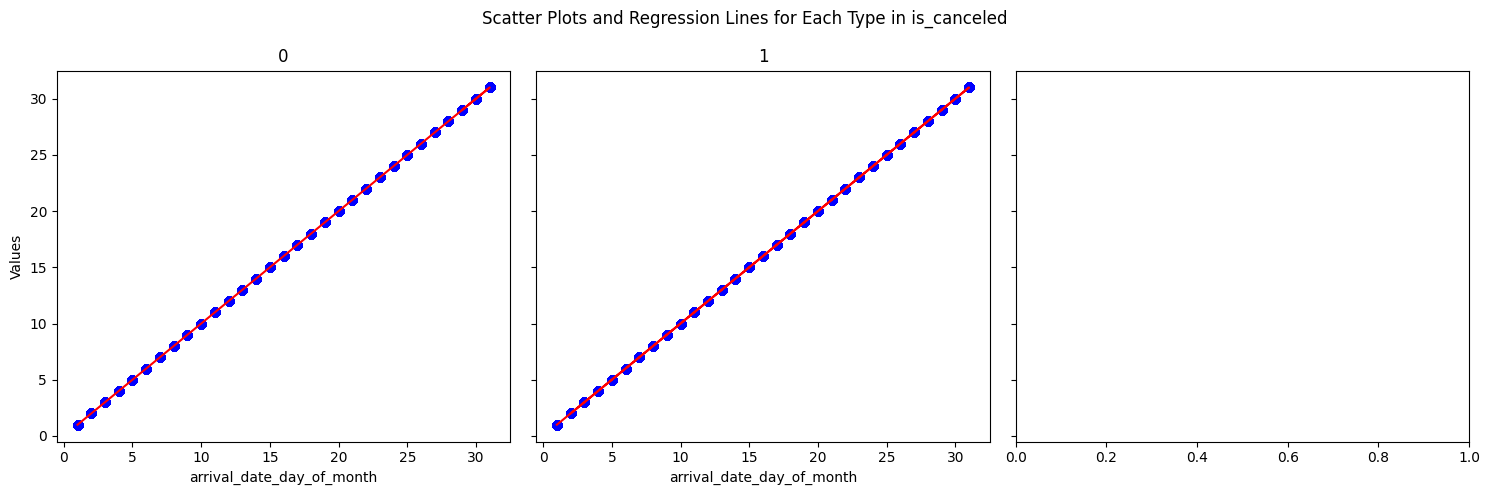

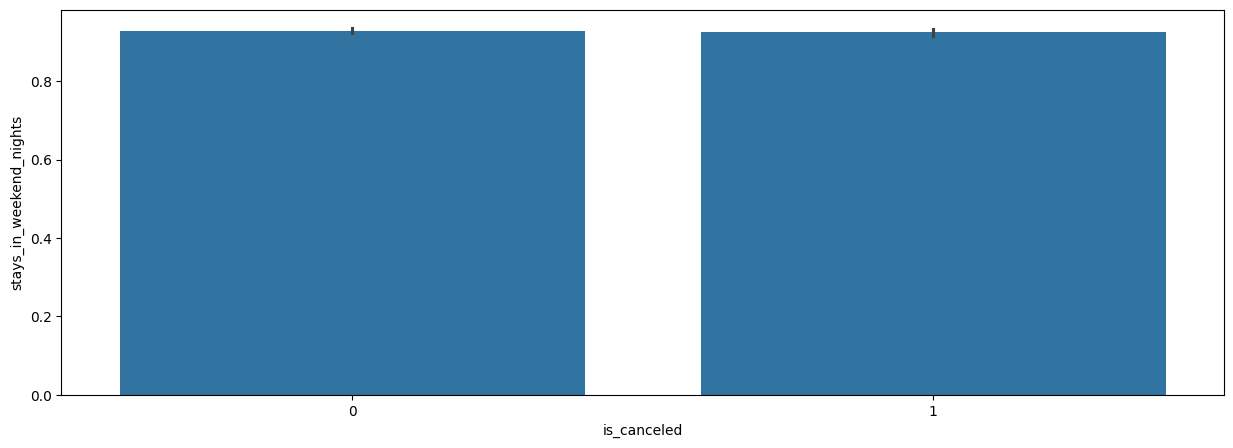

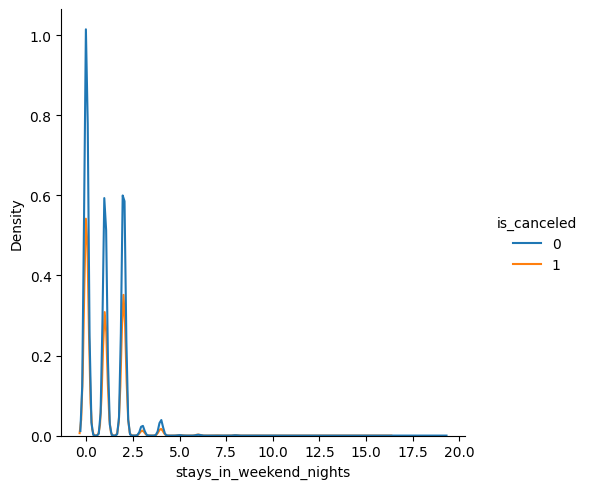

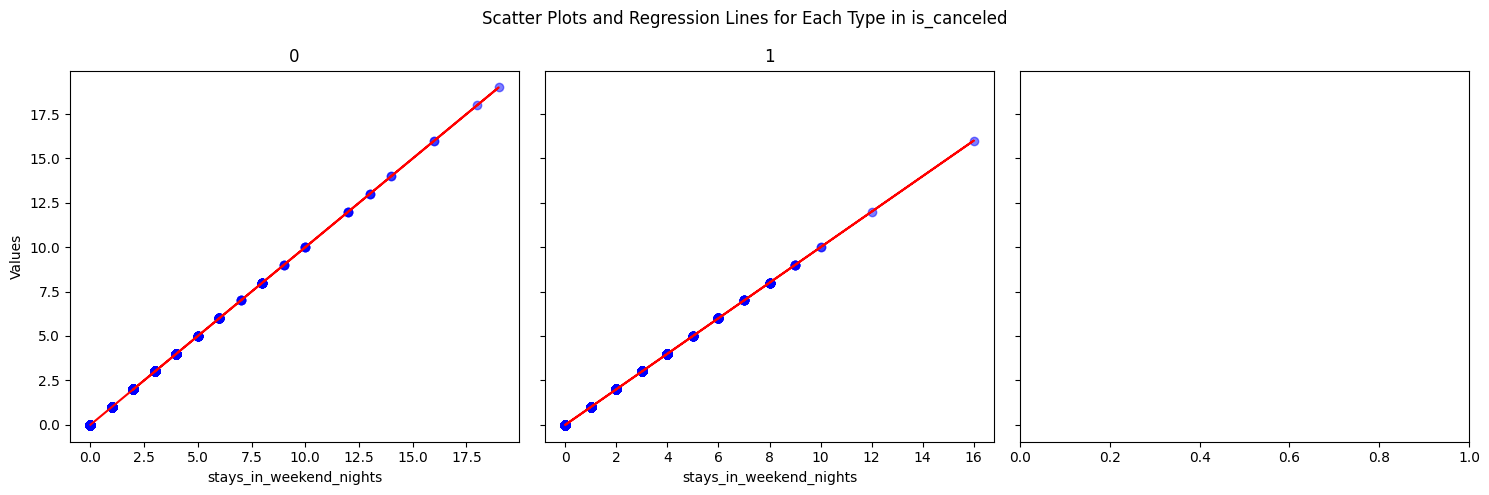

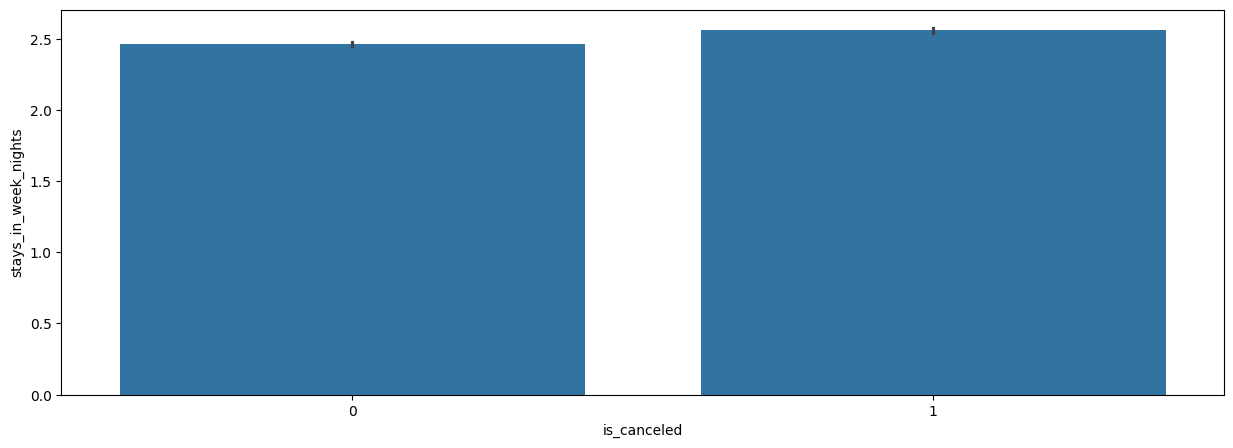

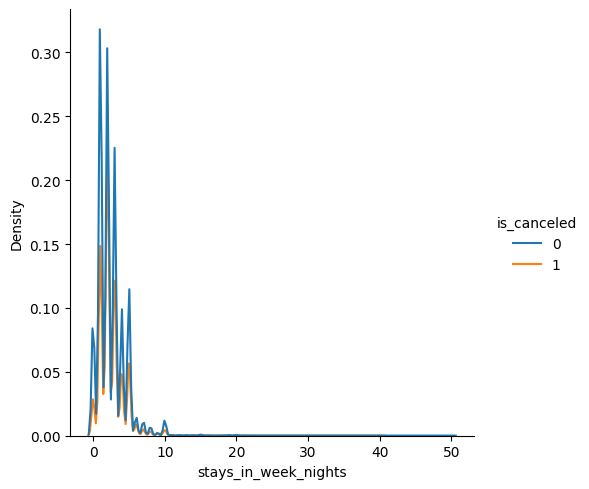

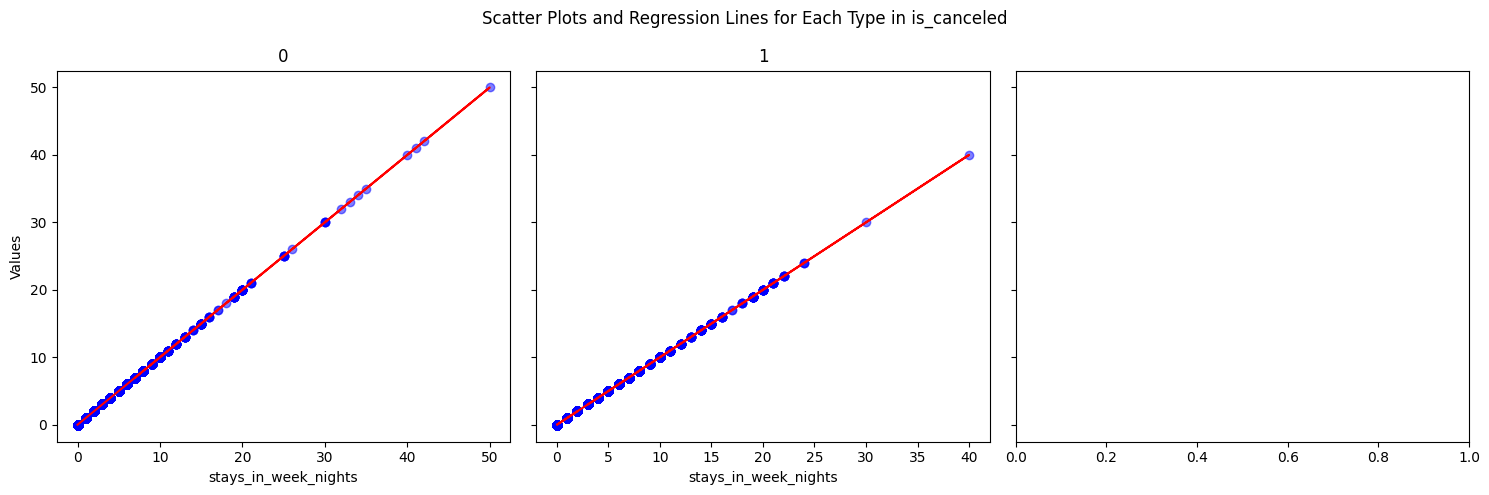

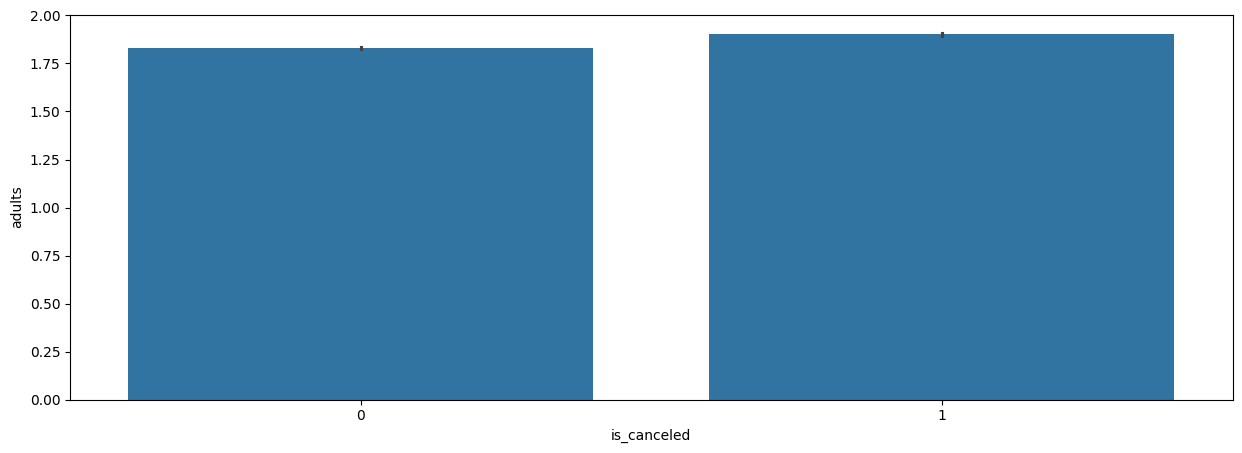

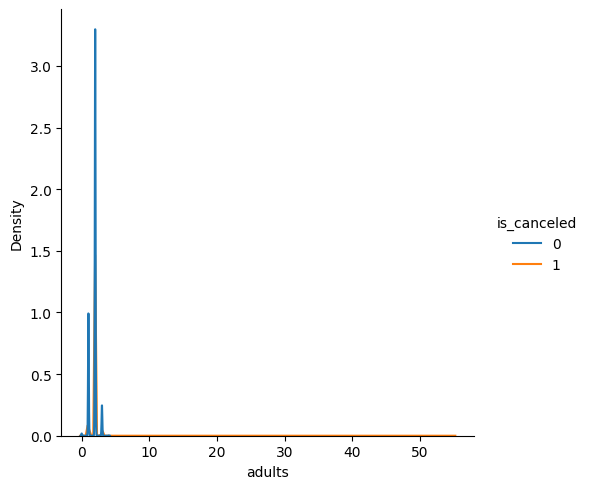

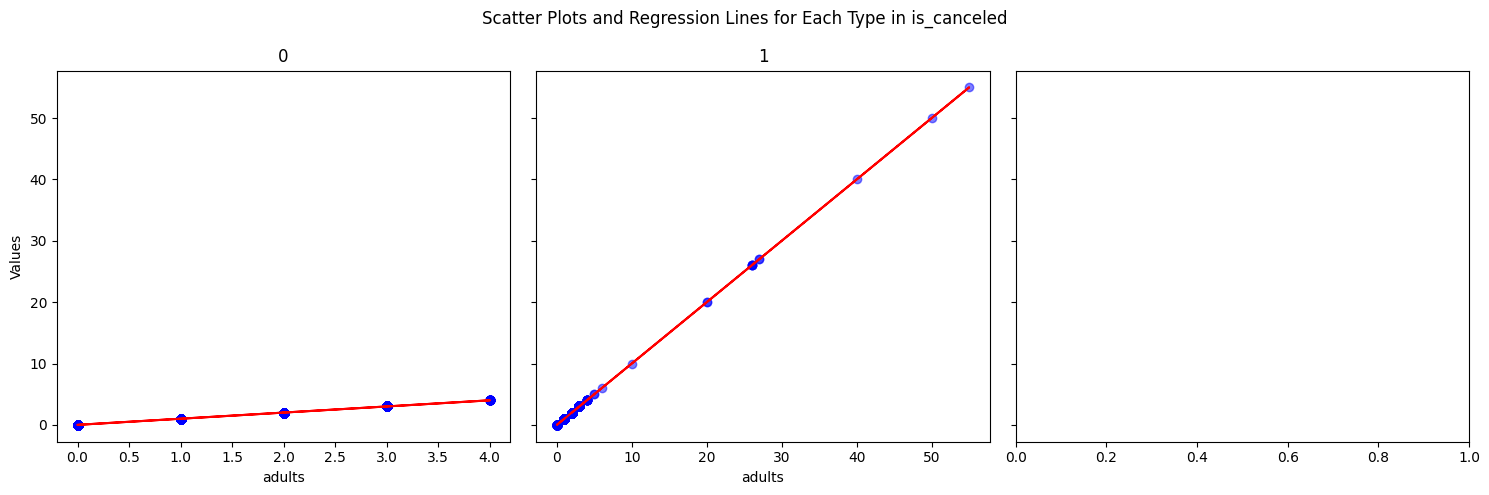

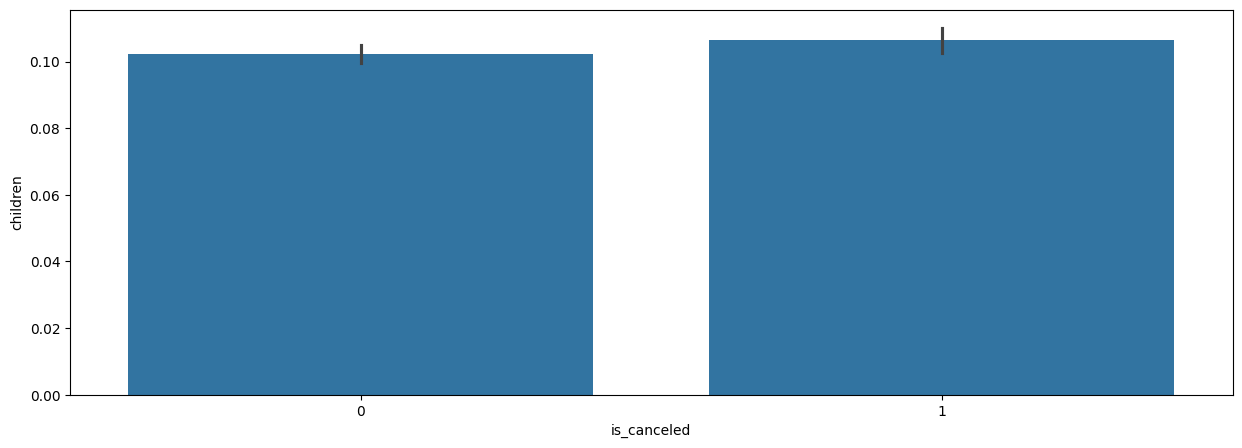

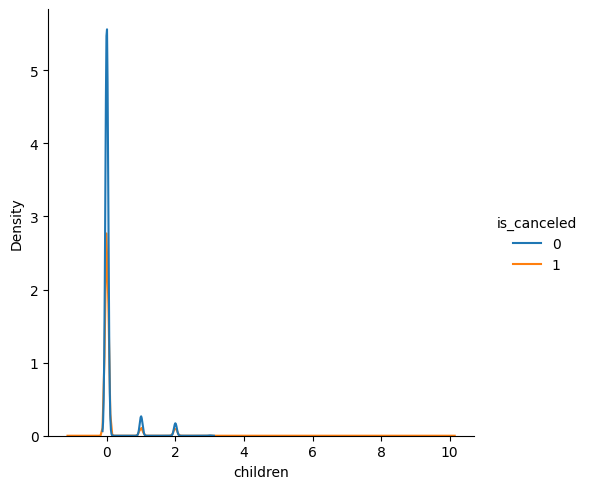

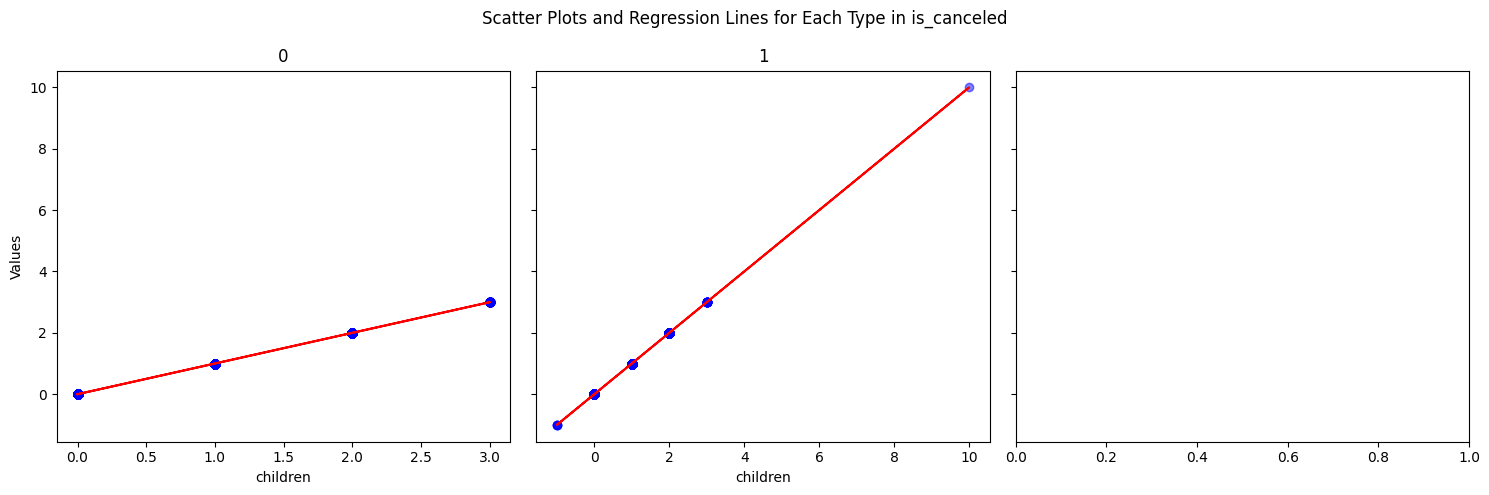

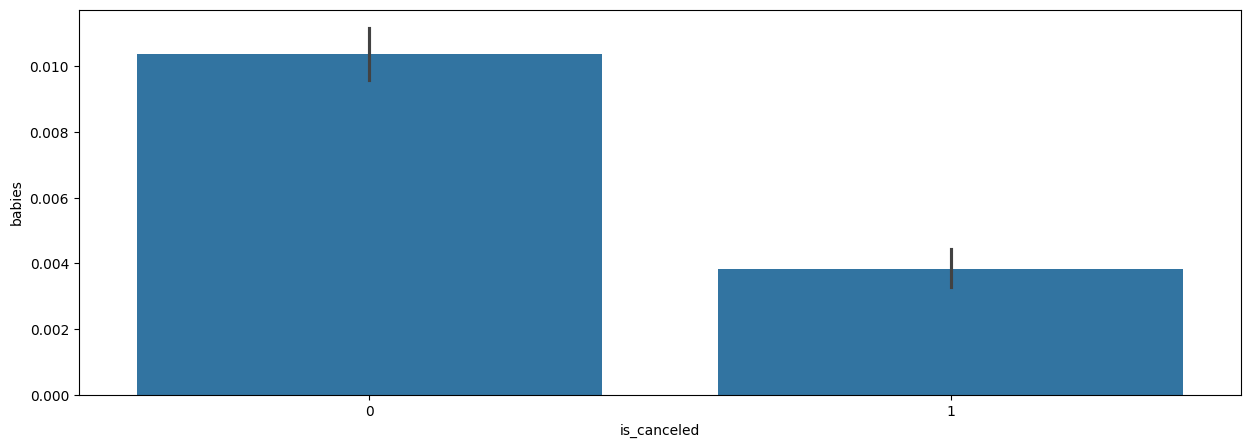

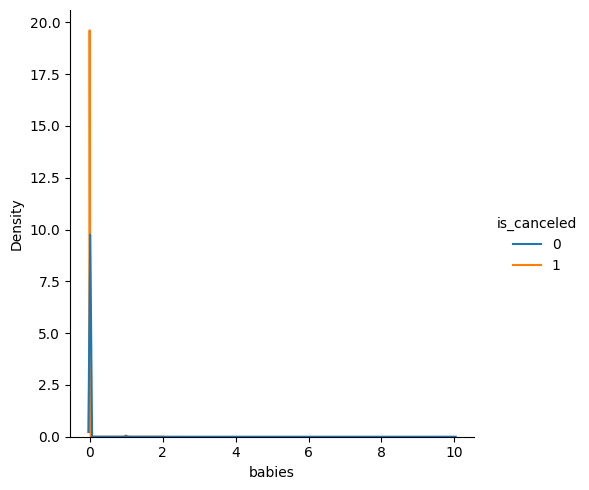

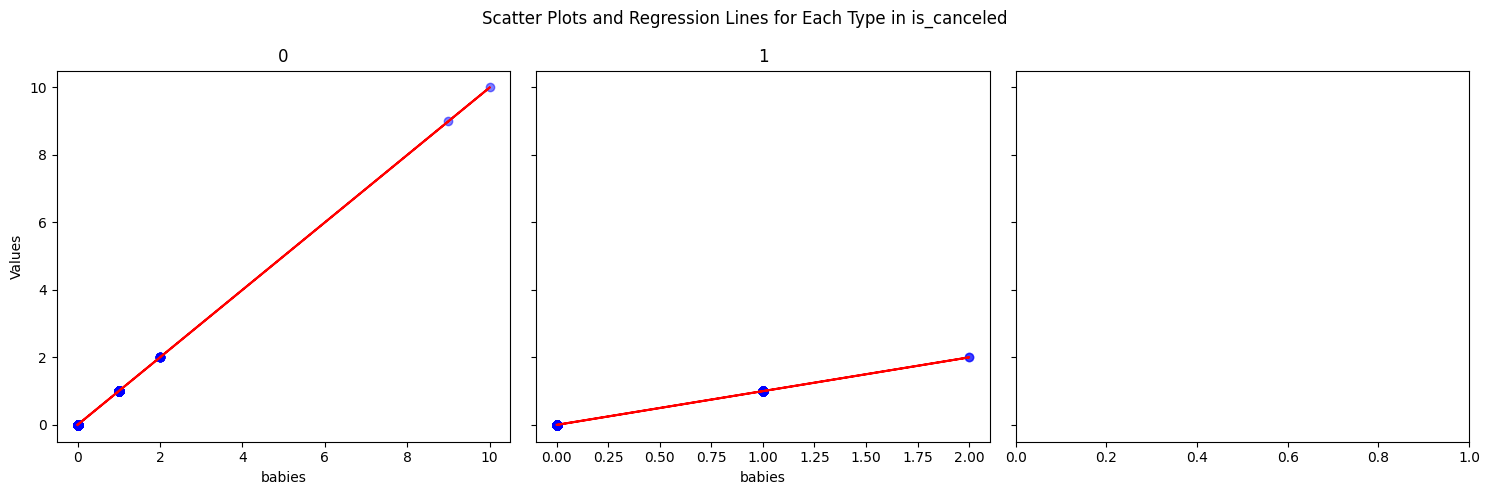

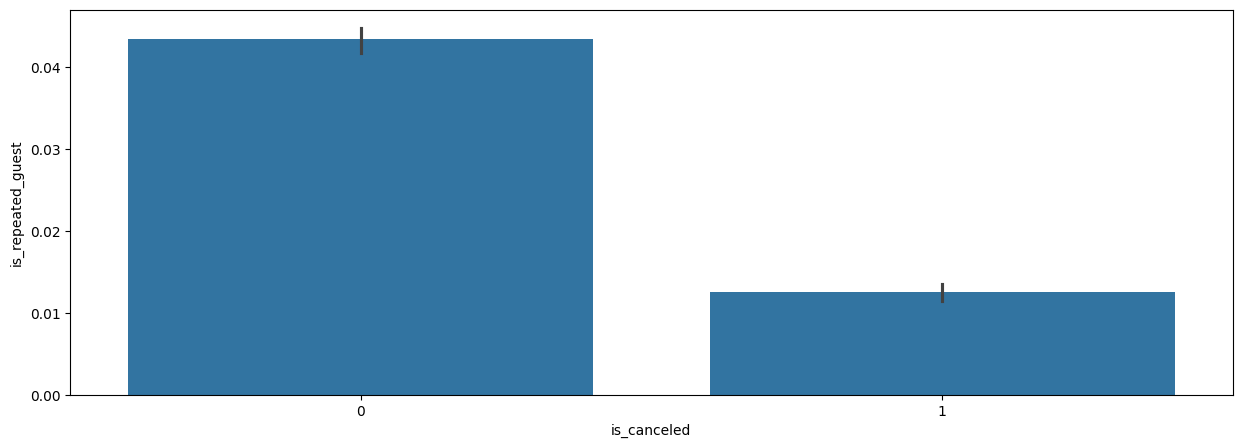

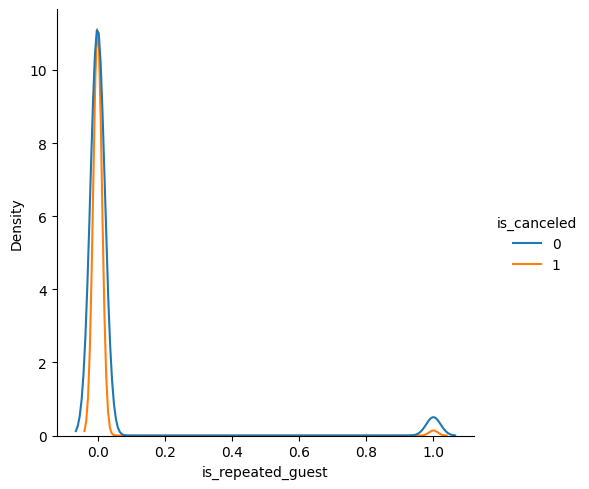

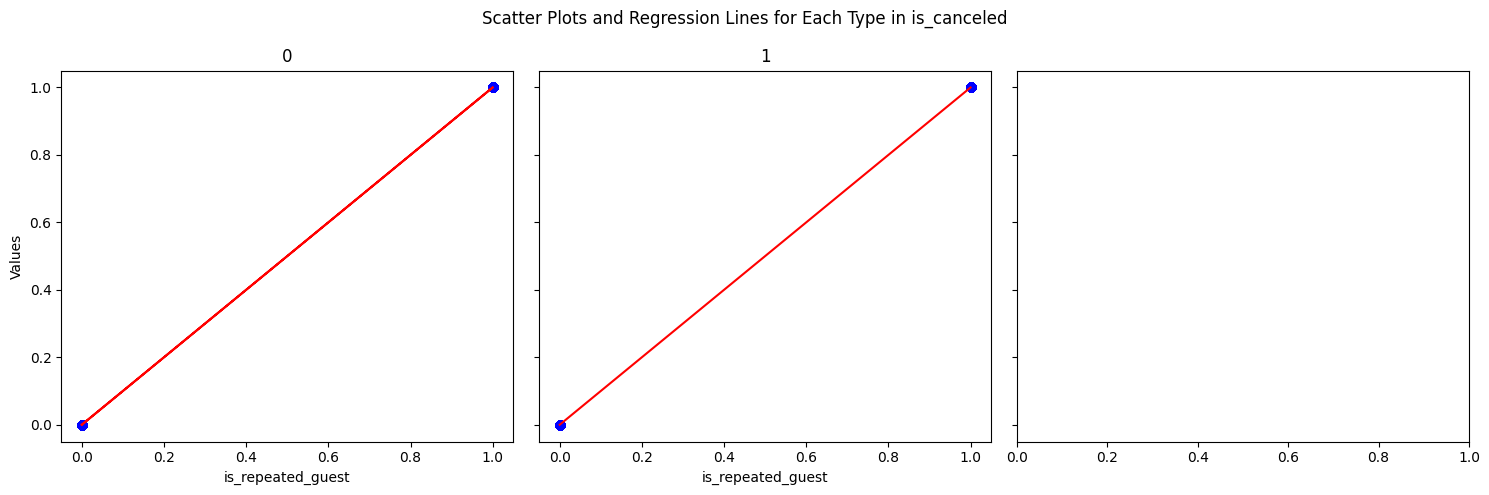

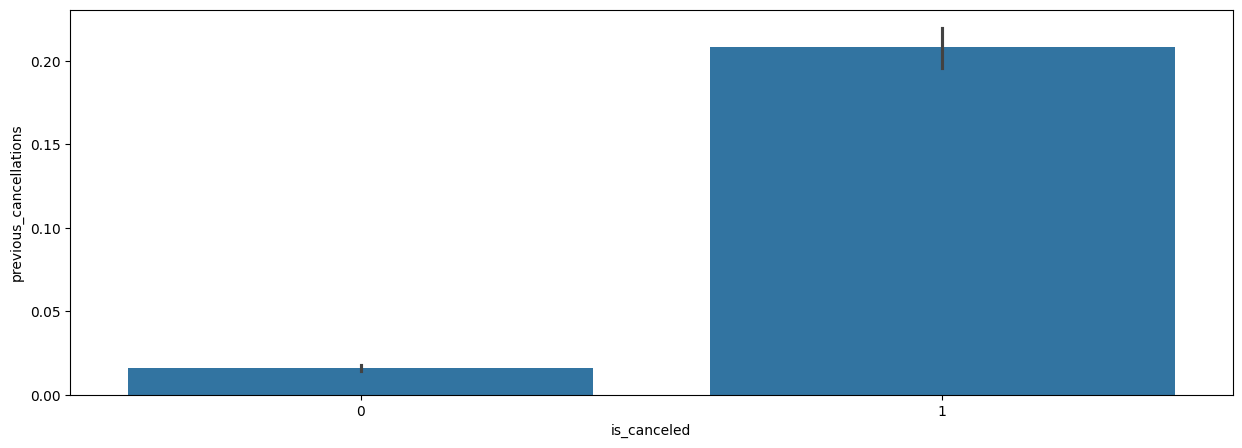

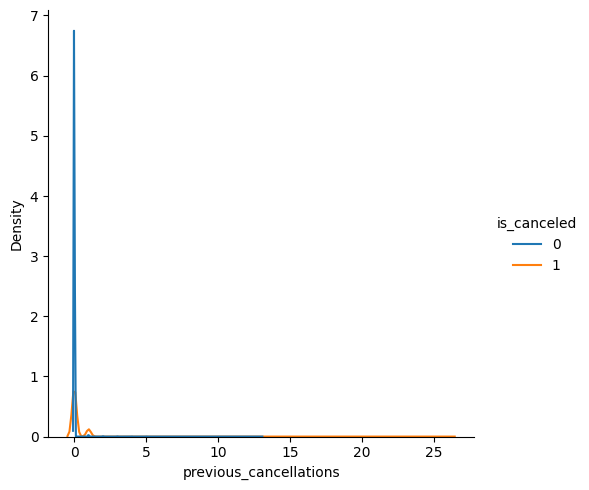

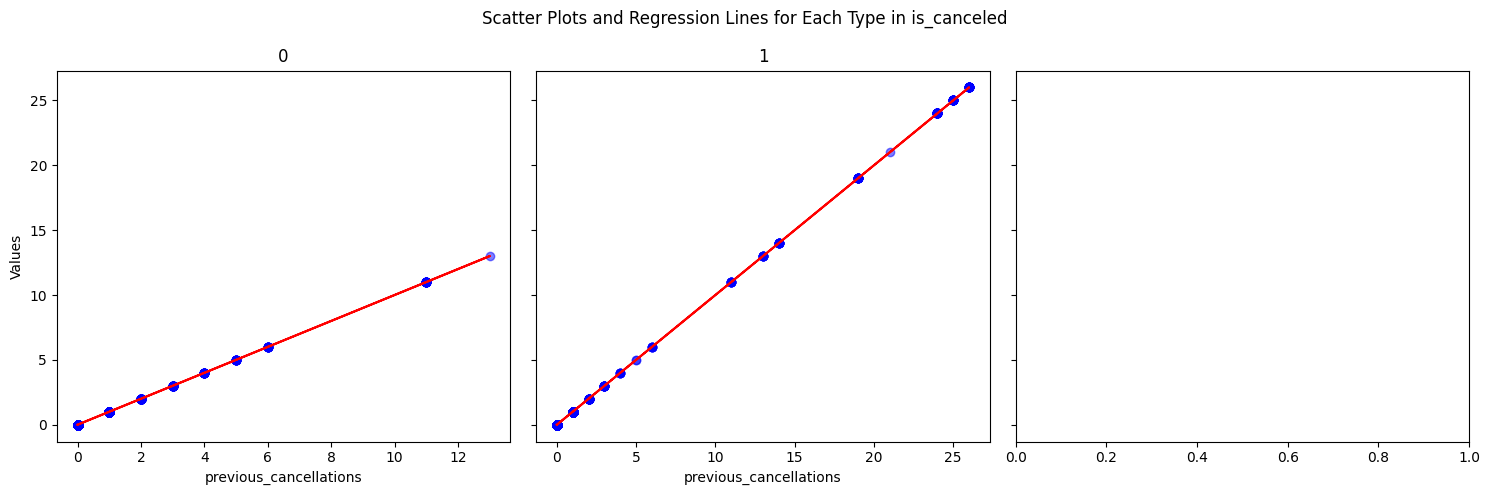

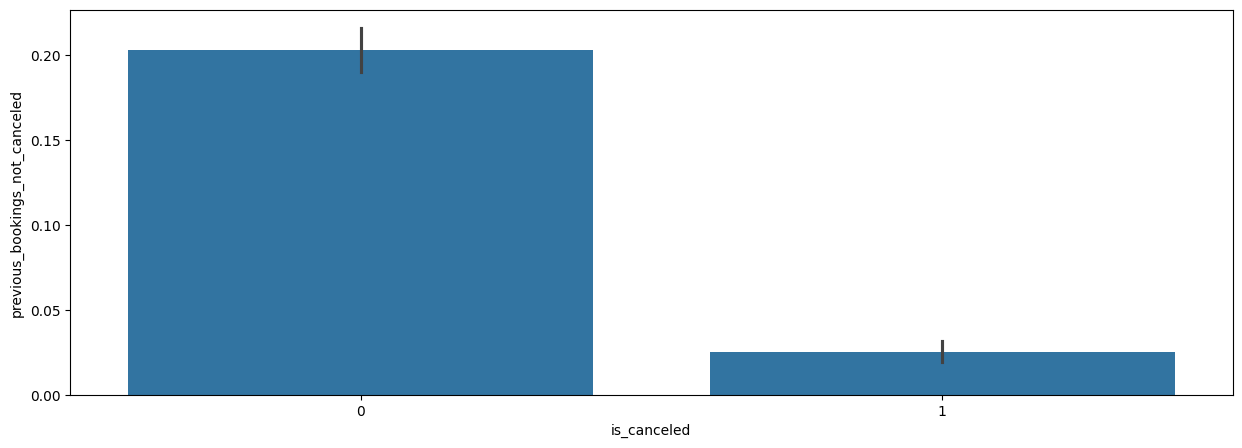

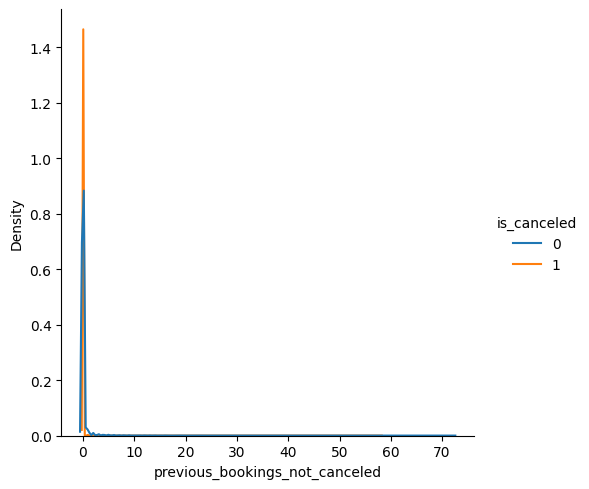

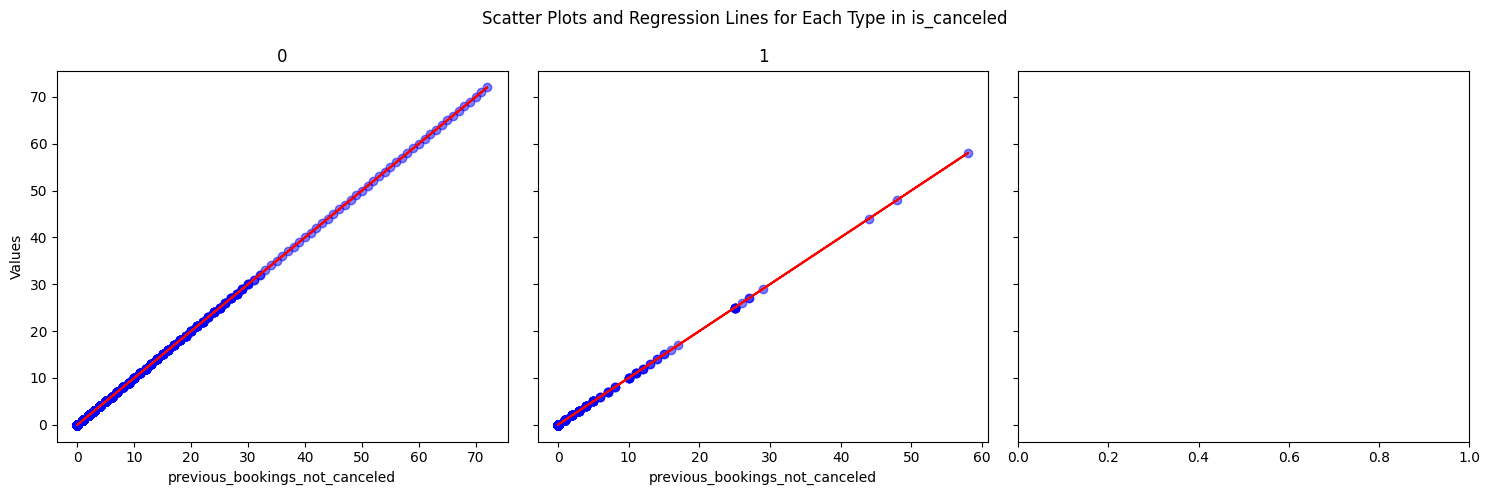

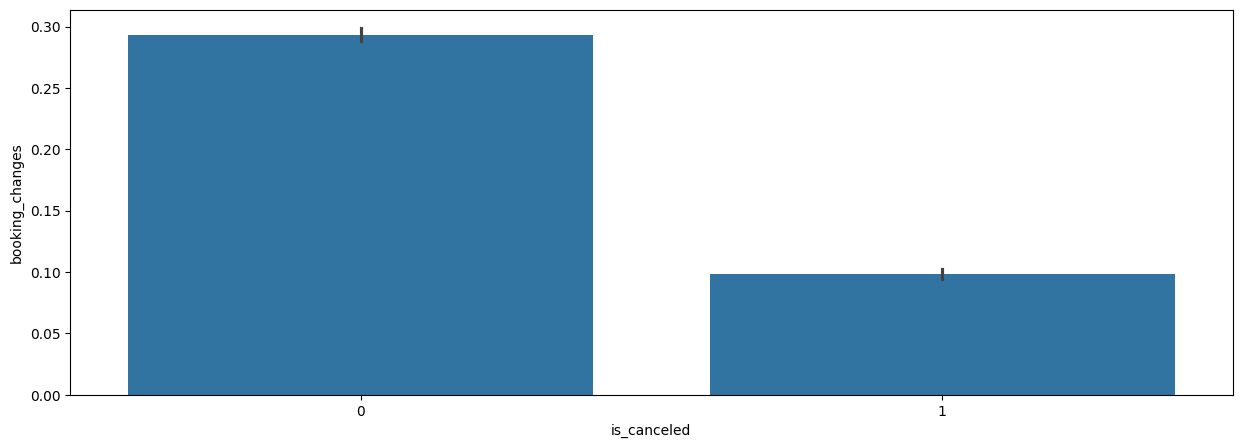

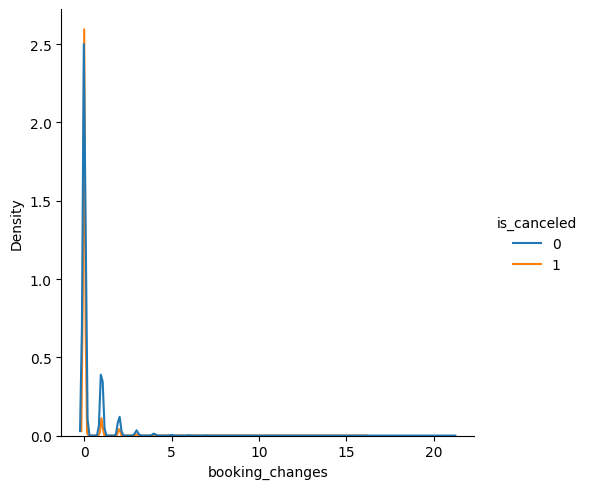

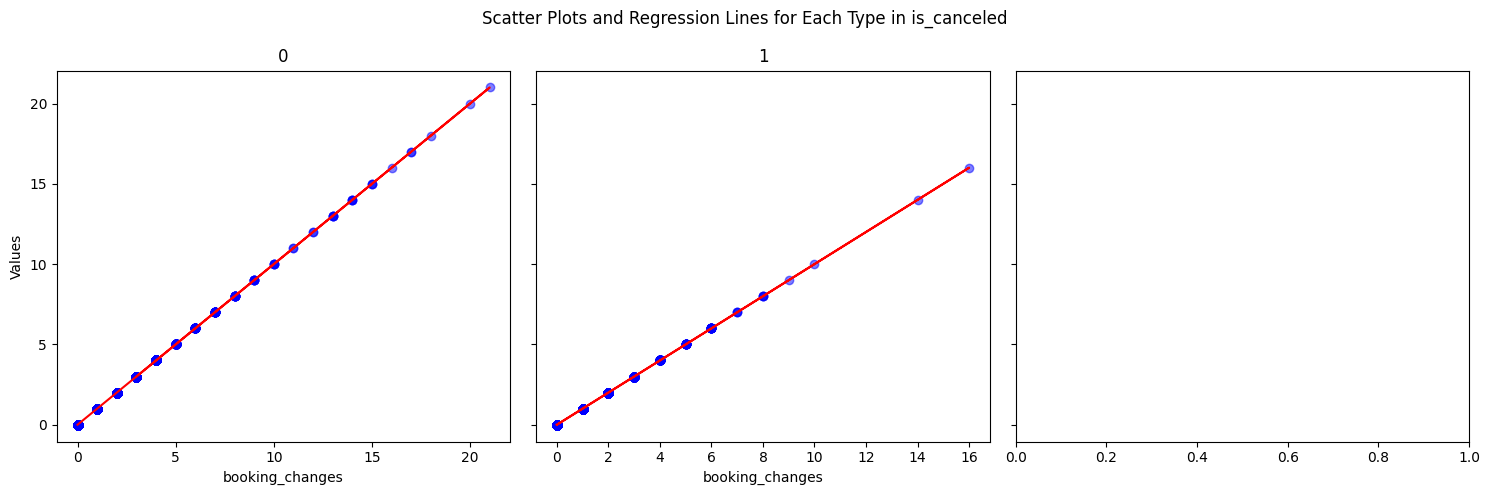

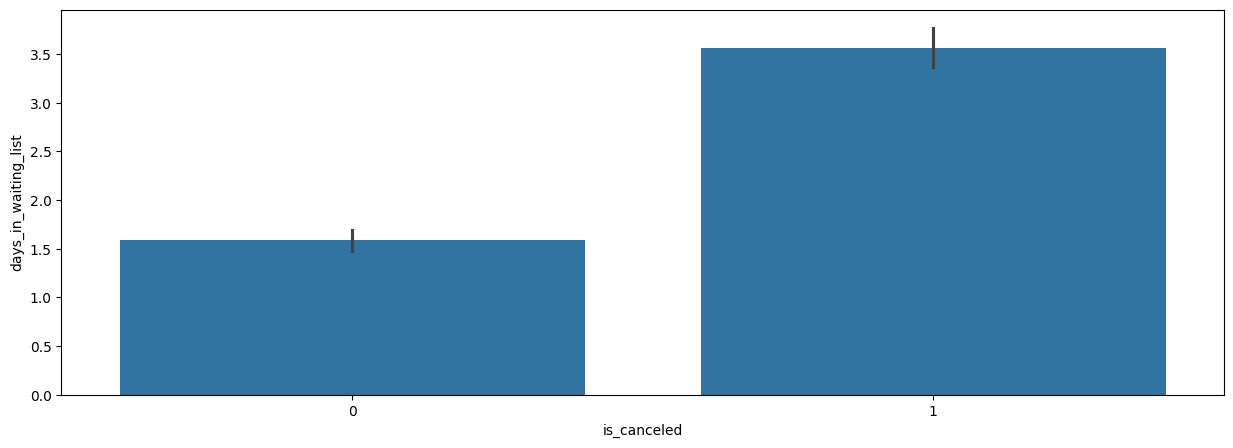

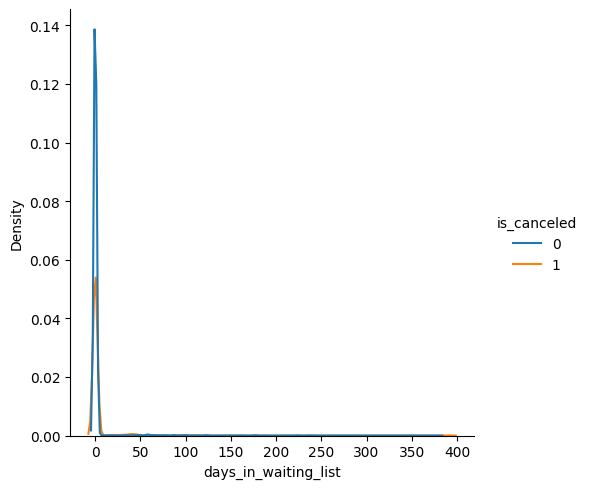

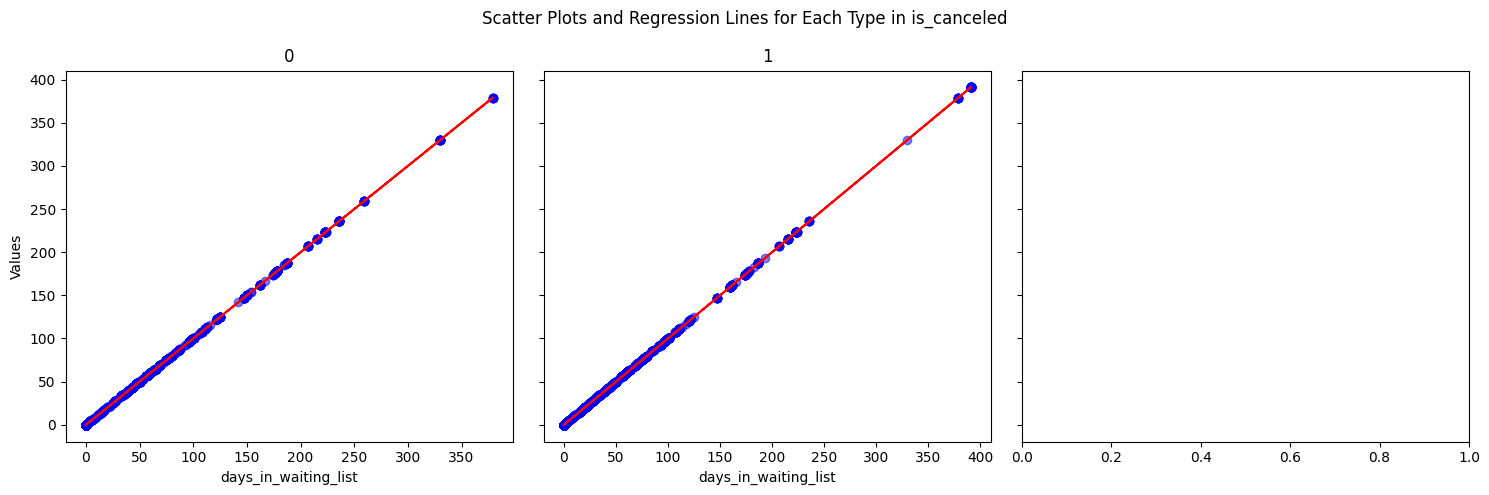

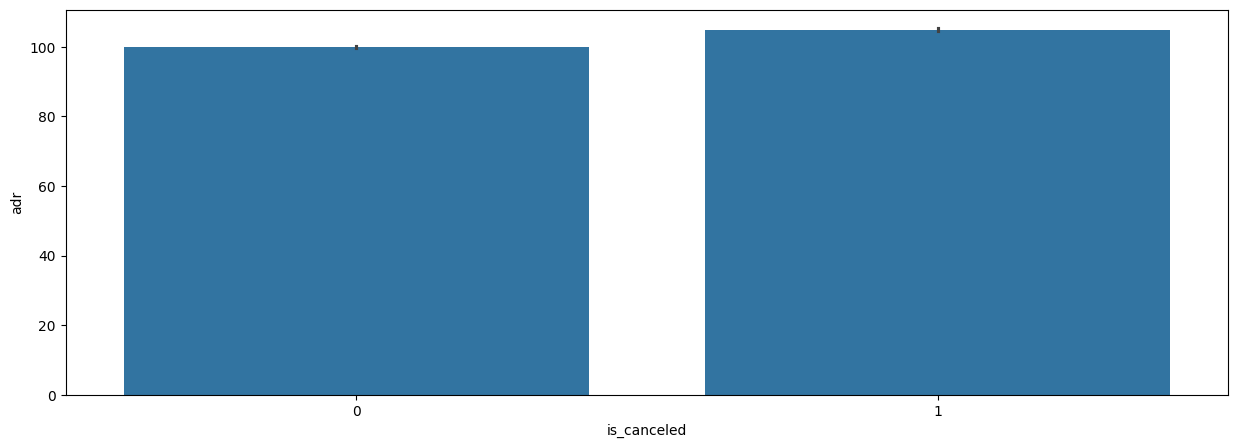

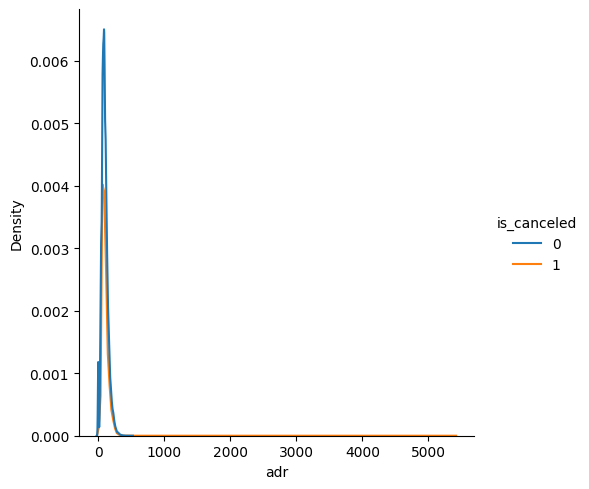

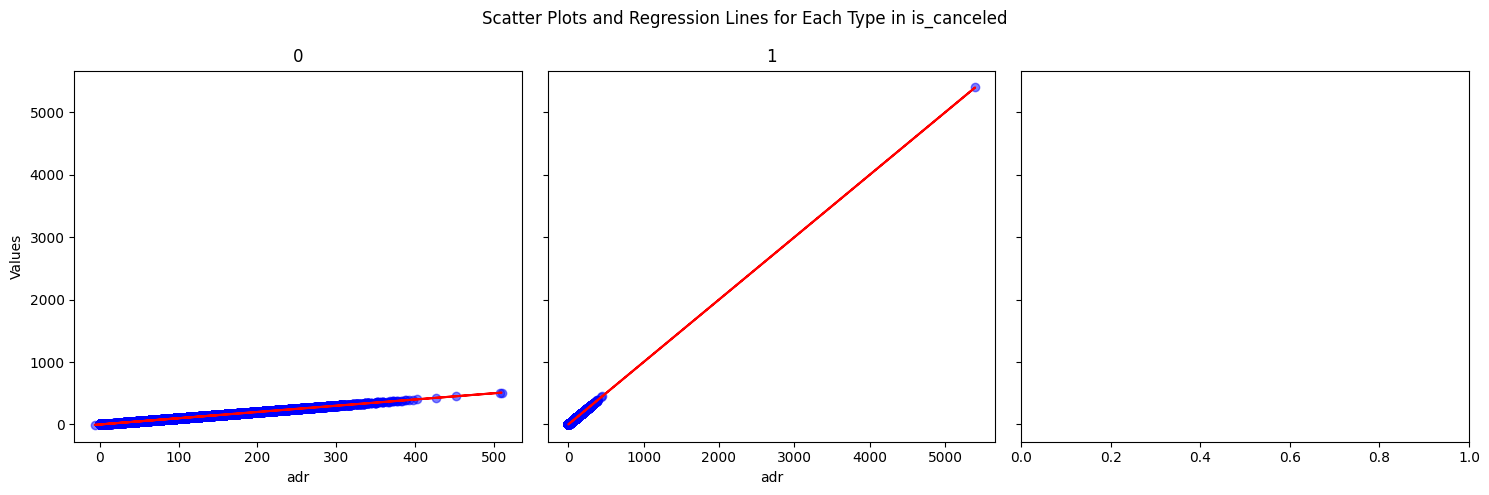

C:\Users\Vasco\AppData\Local\Temp\ipykernel_22060\694410418.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


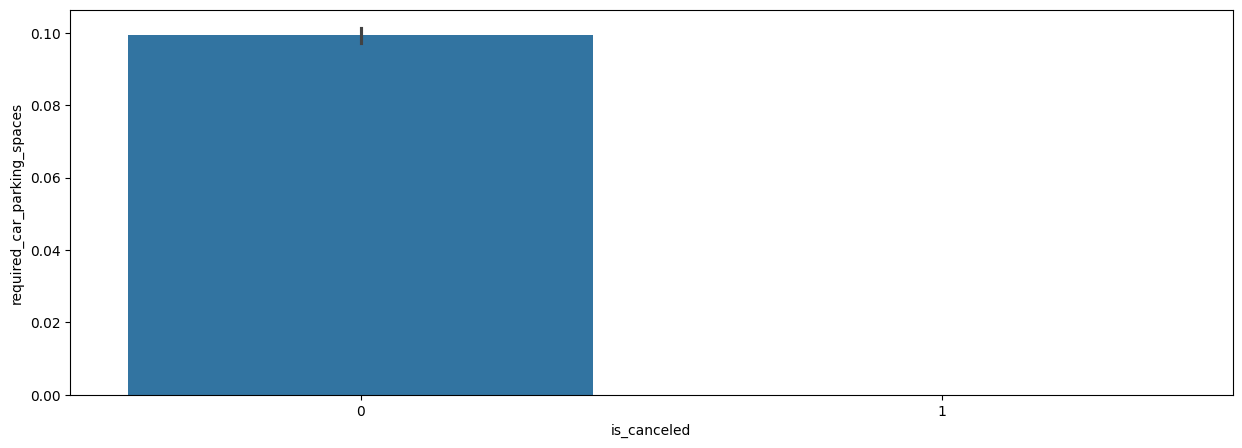

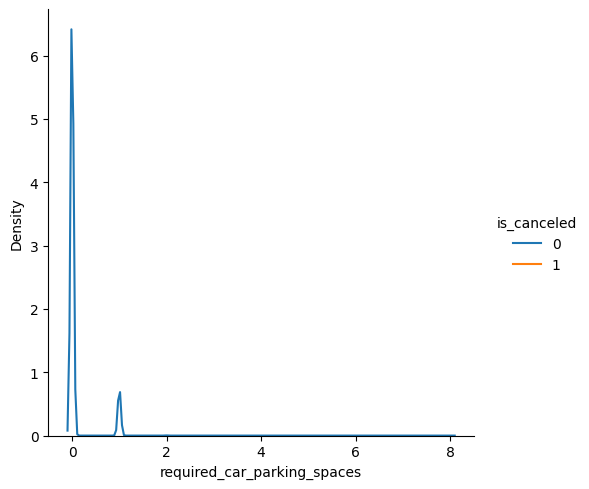

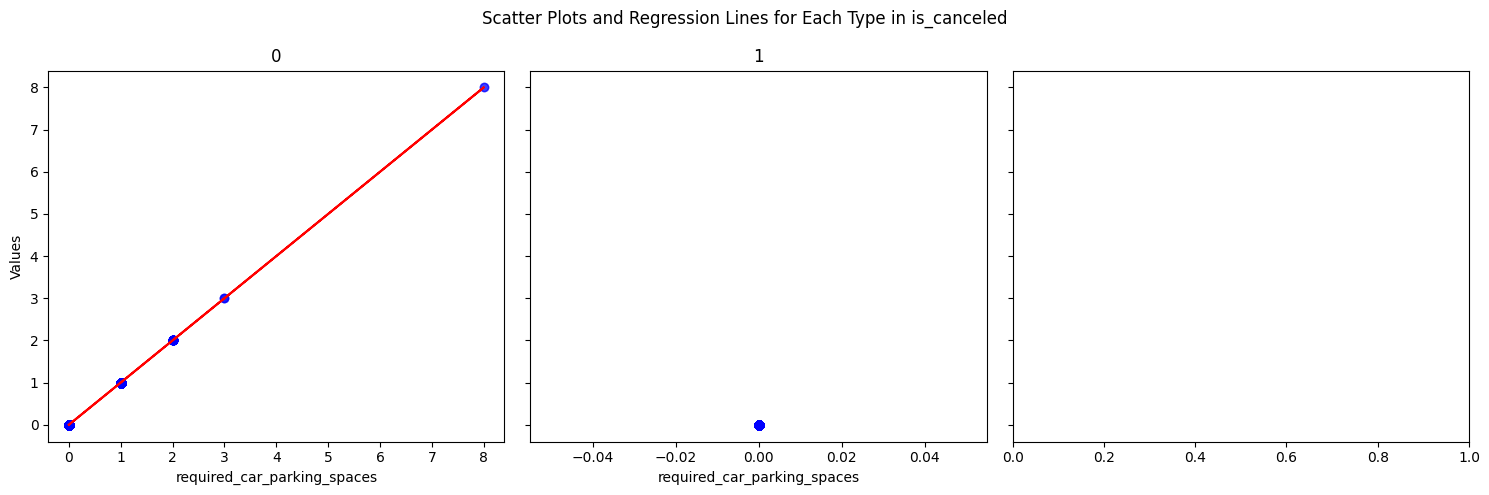

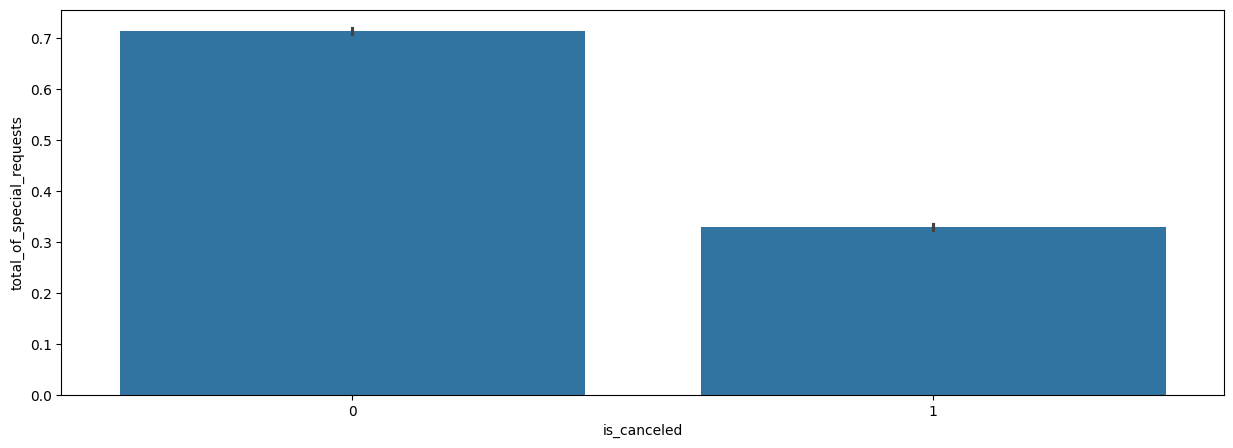

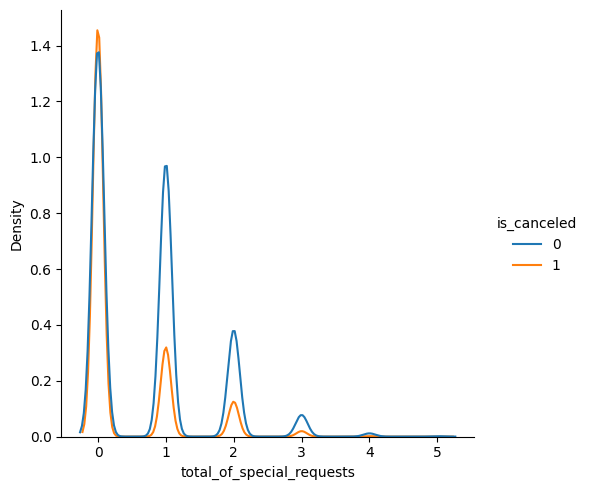

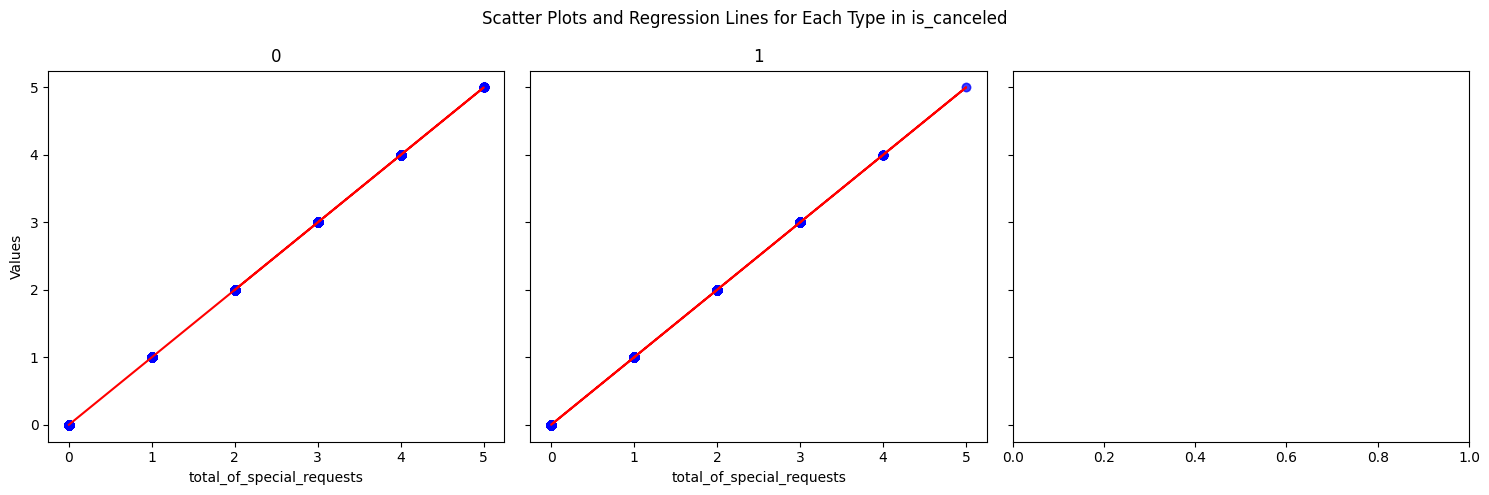

In [8]:
from sklearn.linear_model import LinearRegression

# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    


    Objective_col = data.columns[1]

    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=data, x=Objective_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[Objective_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[Objective_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {Objective_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



variables_to_analyse=numerical_columns

# Realizar a análise bivariada para cada variável
for variable in variables_to_analyse:
    bivariate_analysis(data, variable)




In [20]:

categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# Get the number of unique values for categorical columns
unique_values_per_categorical_column = data[categorical_columns].nunique()

# Print the result
print(unique_values_per_categorical_column)

# Function to display the counts of is_canceled for each unique value in the column
def display_cancellation_counts(data, column, top_n=10):
    unique_vals = data[column].nunique()
    
    # Group by the column and the 'is_canceled' column, and count occurrences
    grouped = data.groupby([column, 'is_canceled']).size().unstack(fill_value=0)
    
    if unique_vals <= top_n:
        # If the number of unique values is small, show all counts
        print(f"\nColumn: {column}")
        print(grouped)
    else:
        # If there are many unique values, show the top N values based on their total counts
        top_values = data[column].value_counts().head(top_n).index
        print(f"\nColumn: {column} (Top {top_n} out of {unique_vals} unique values)")
        print(grouped.loc[top_values])

# Apply the function for each column except 'is_canceled'
for column in categorical_columns:
     display_cancellation_counts(data, column)

hotel                           2
arrival_date_month             12
meal                            5
country                       178
market_segment                  8
distribution_channel            5
reserved_room_type             10
assigned_room_type             12
deposit_type                    3
agent                         334
company                       353
customer_type                   4
reservation_status              3
reservation_status_date       926
name                        81503
email                      115889
phone-number               119390
credit_card                  9000
dtype: int64

Column: hotel
is_canceled       0      1
hotel                     
City Hotel    46228  33102
Resort Hotel  28938  11122

Column: arrival_date_month (Top 10 out of 12 unique values)
is_canceled            0     1
arrival_date_month            
August              8638  5239
July                7919  4742
May                 7114  4677
October             6914  4246
April

hotel                           2
arrival_date_month             12
meal                            5
country                       178
market_segment                  8
distribution_channel            5
reserved_room_type             10
assigned_room_type             12
deposit_type                    3
agent                         334
company                       353
customer_type                   4
reservation_status              3
reservation_status_date       926
name                        81503
email                      115889
phone-number               119390
credit_card                  9000
dtype: int64


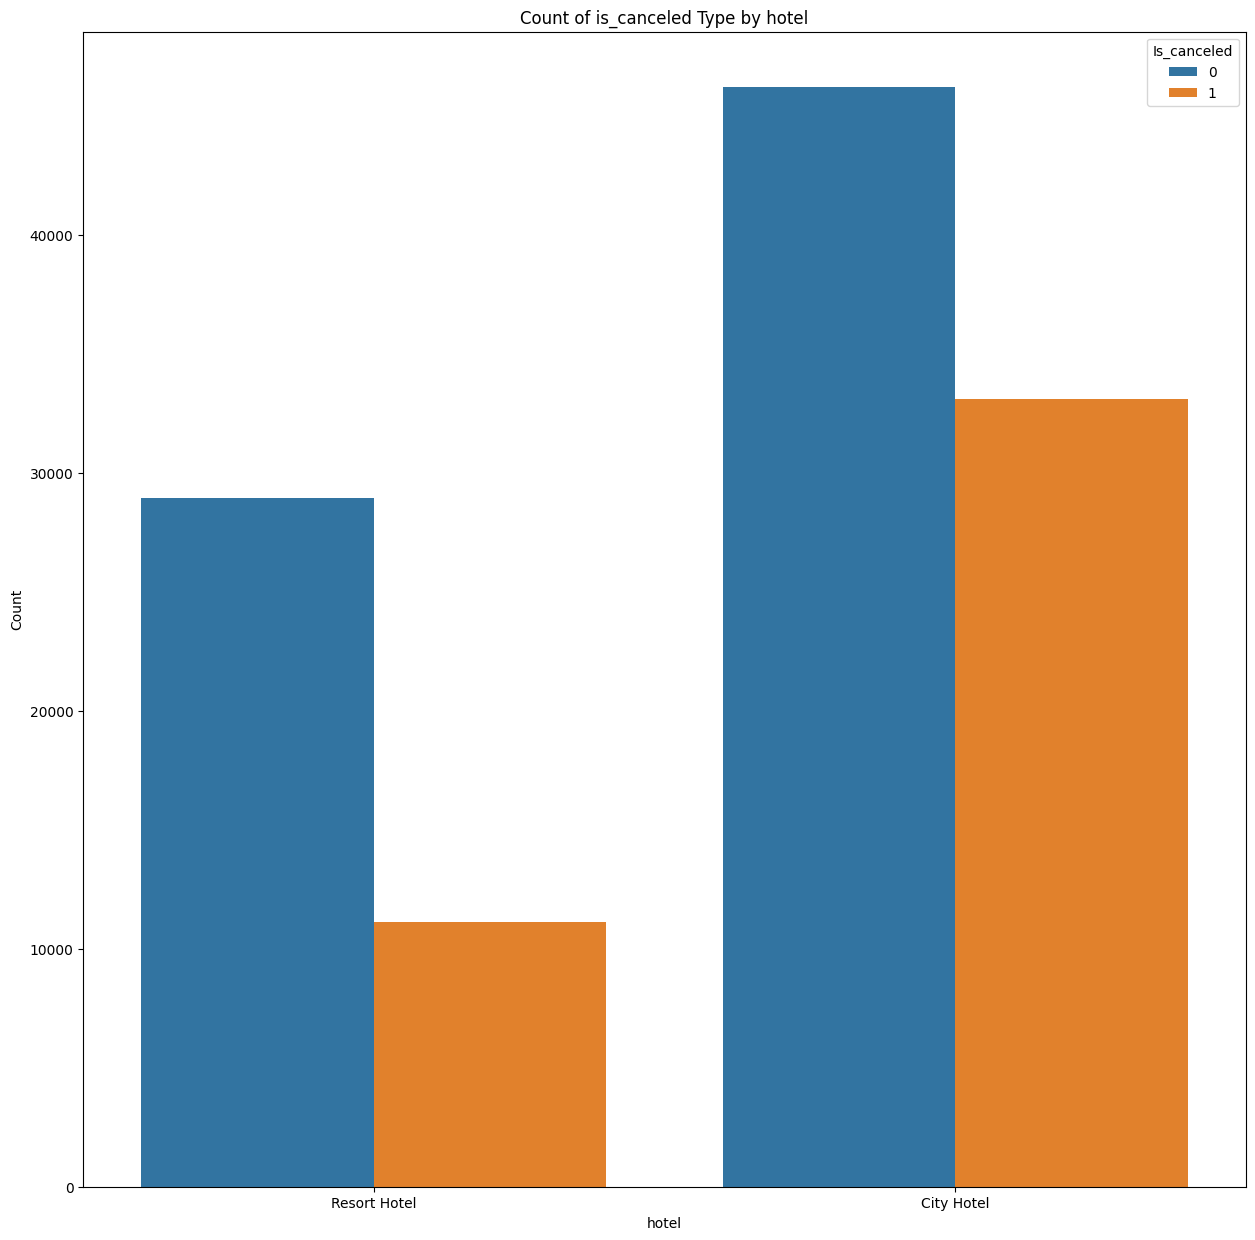

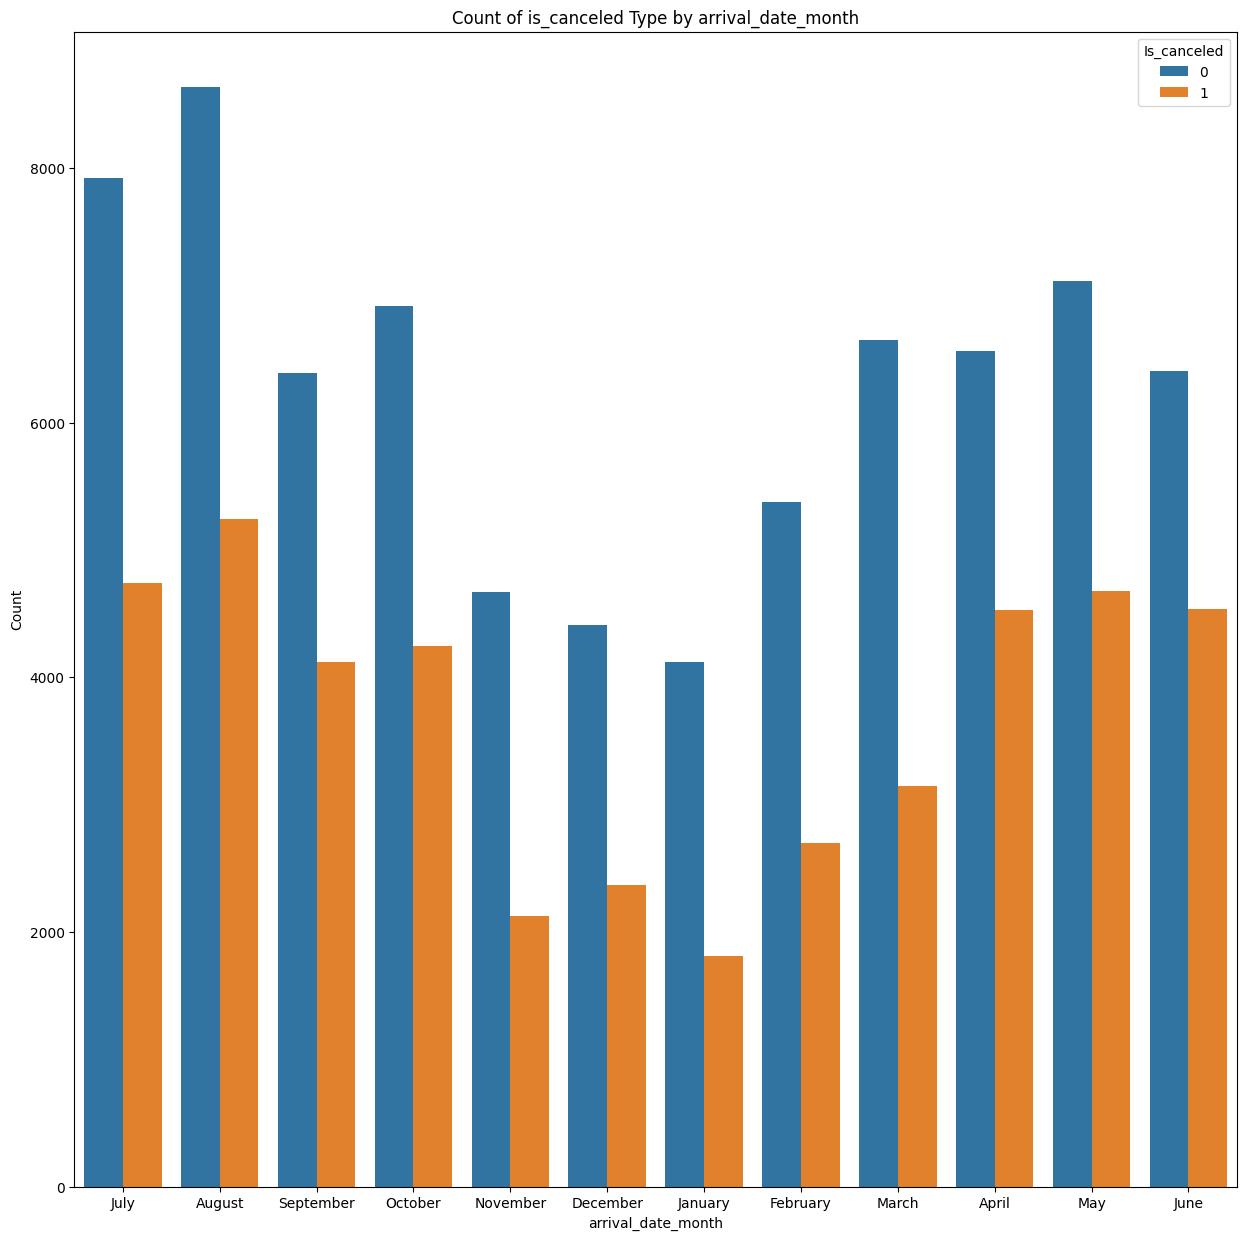

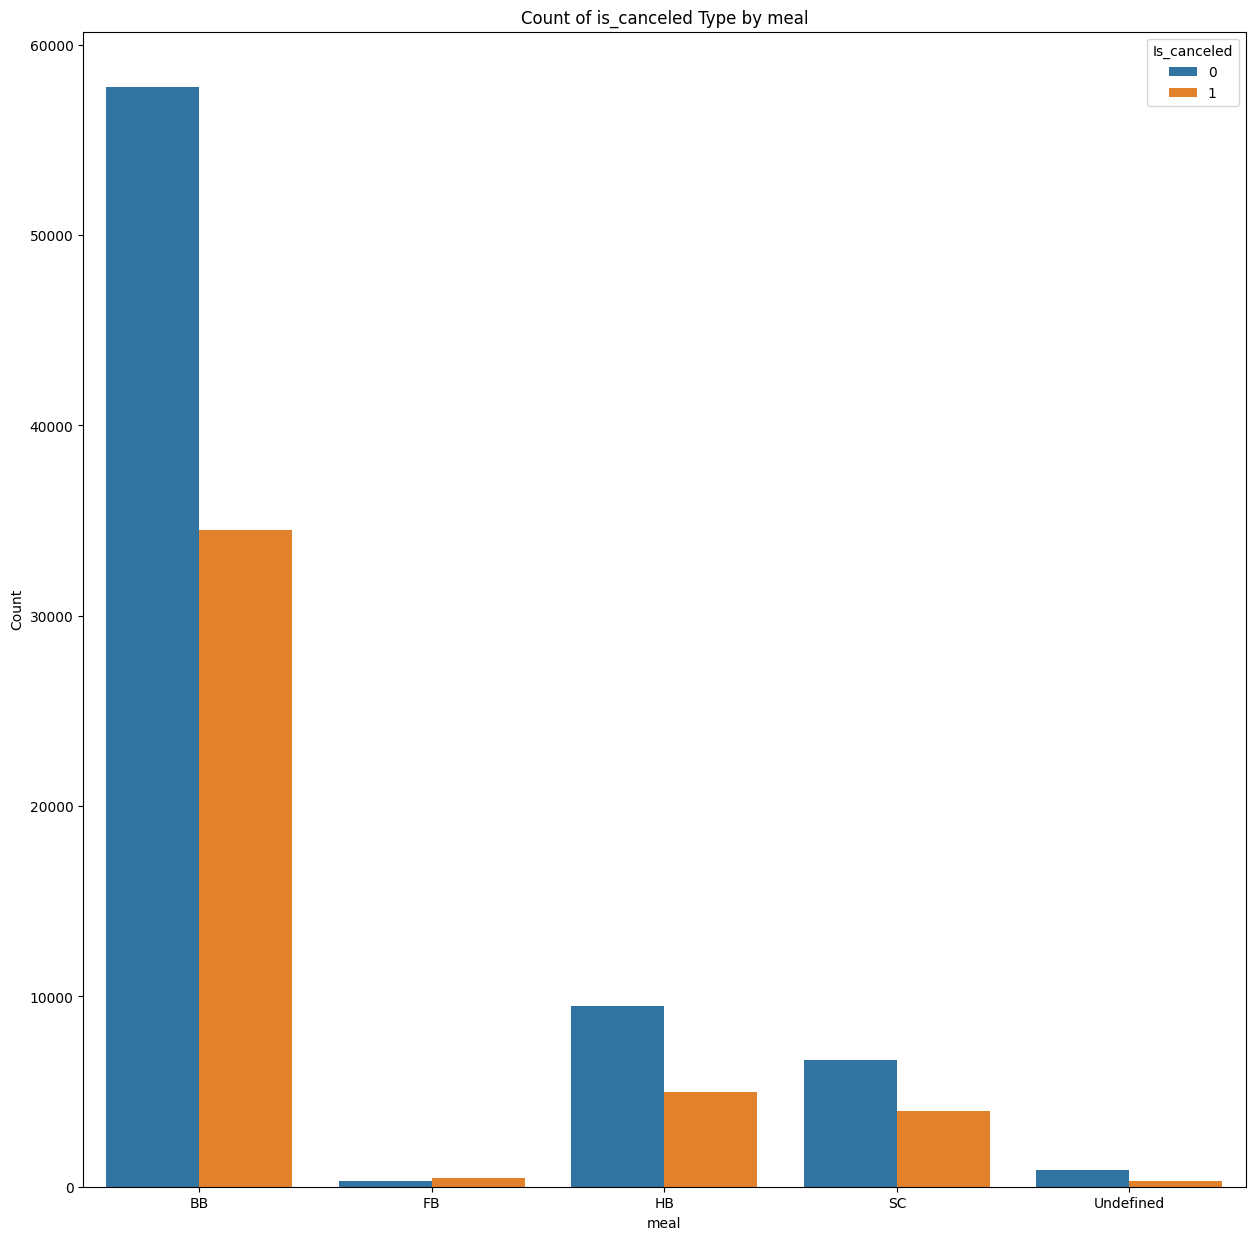

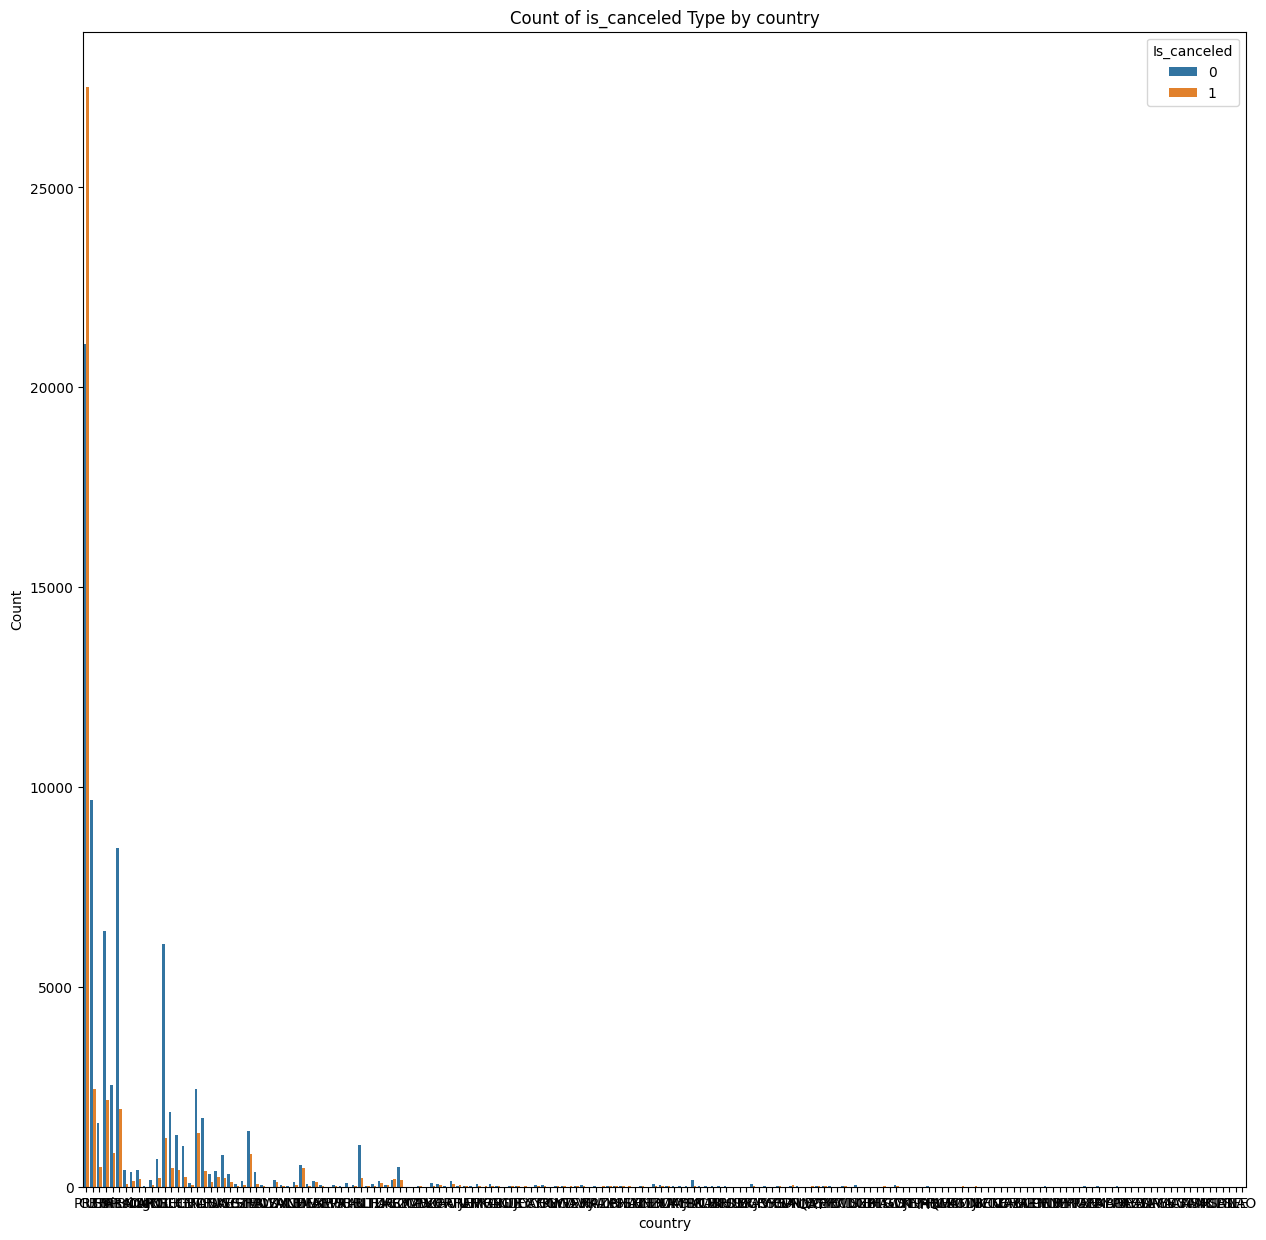

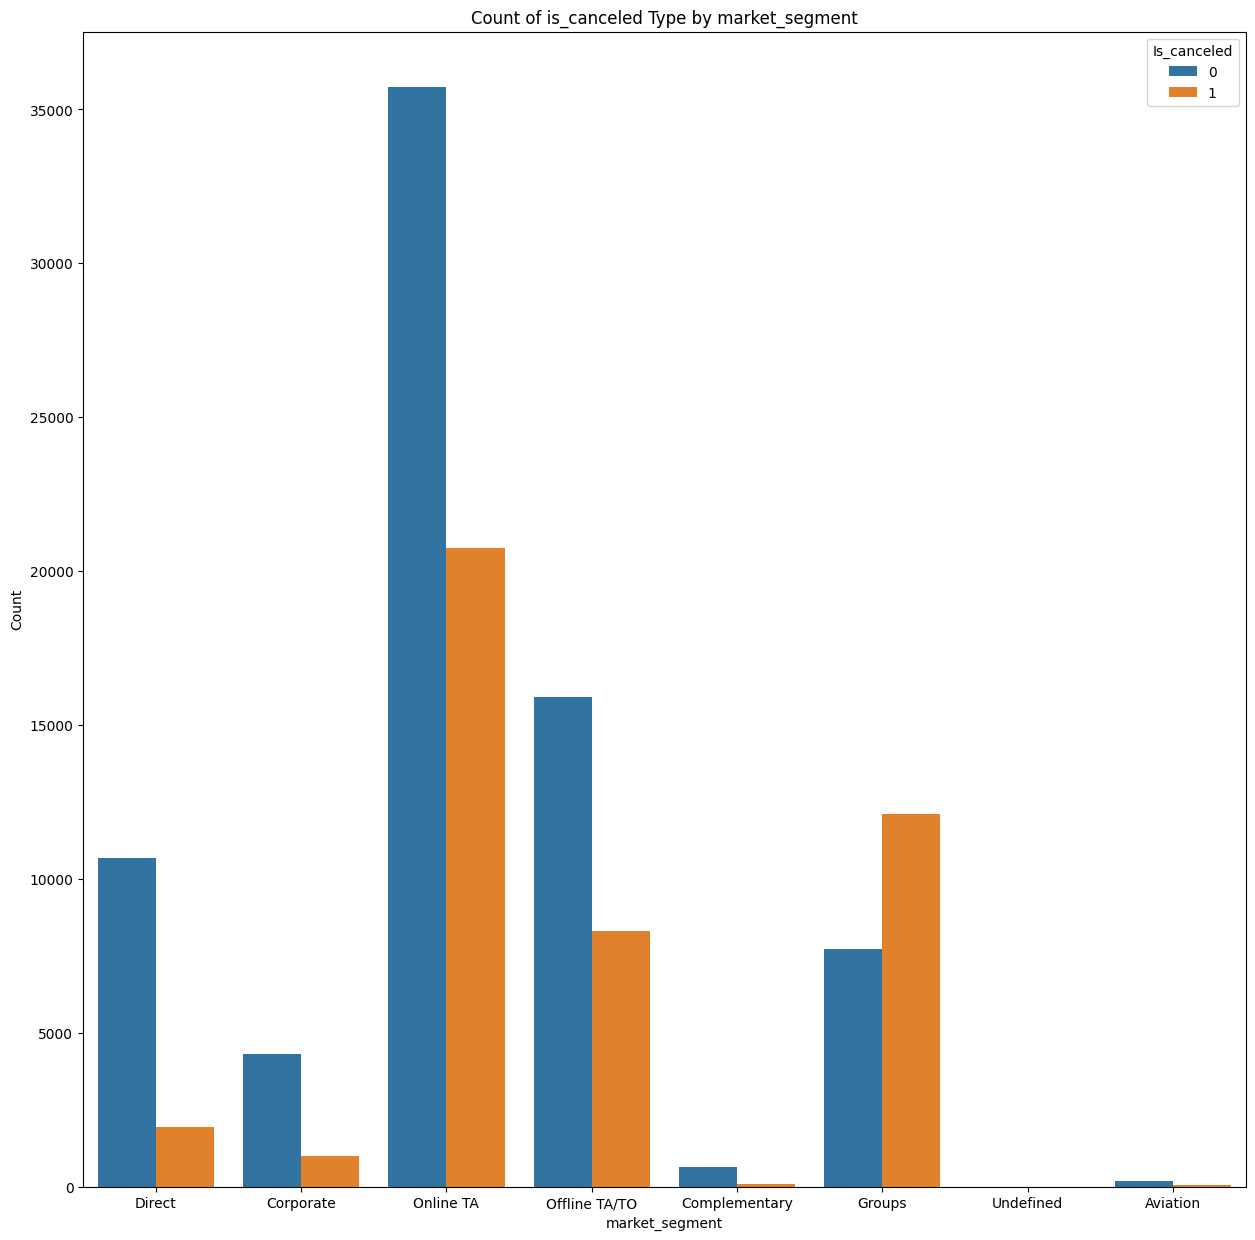

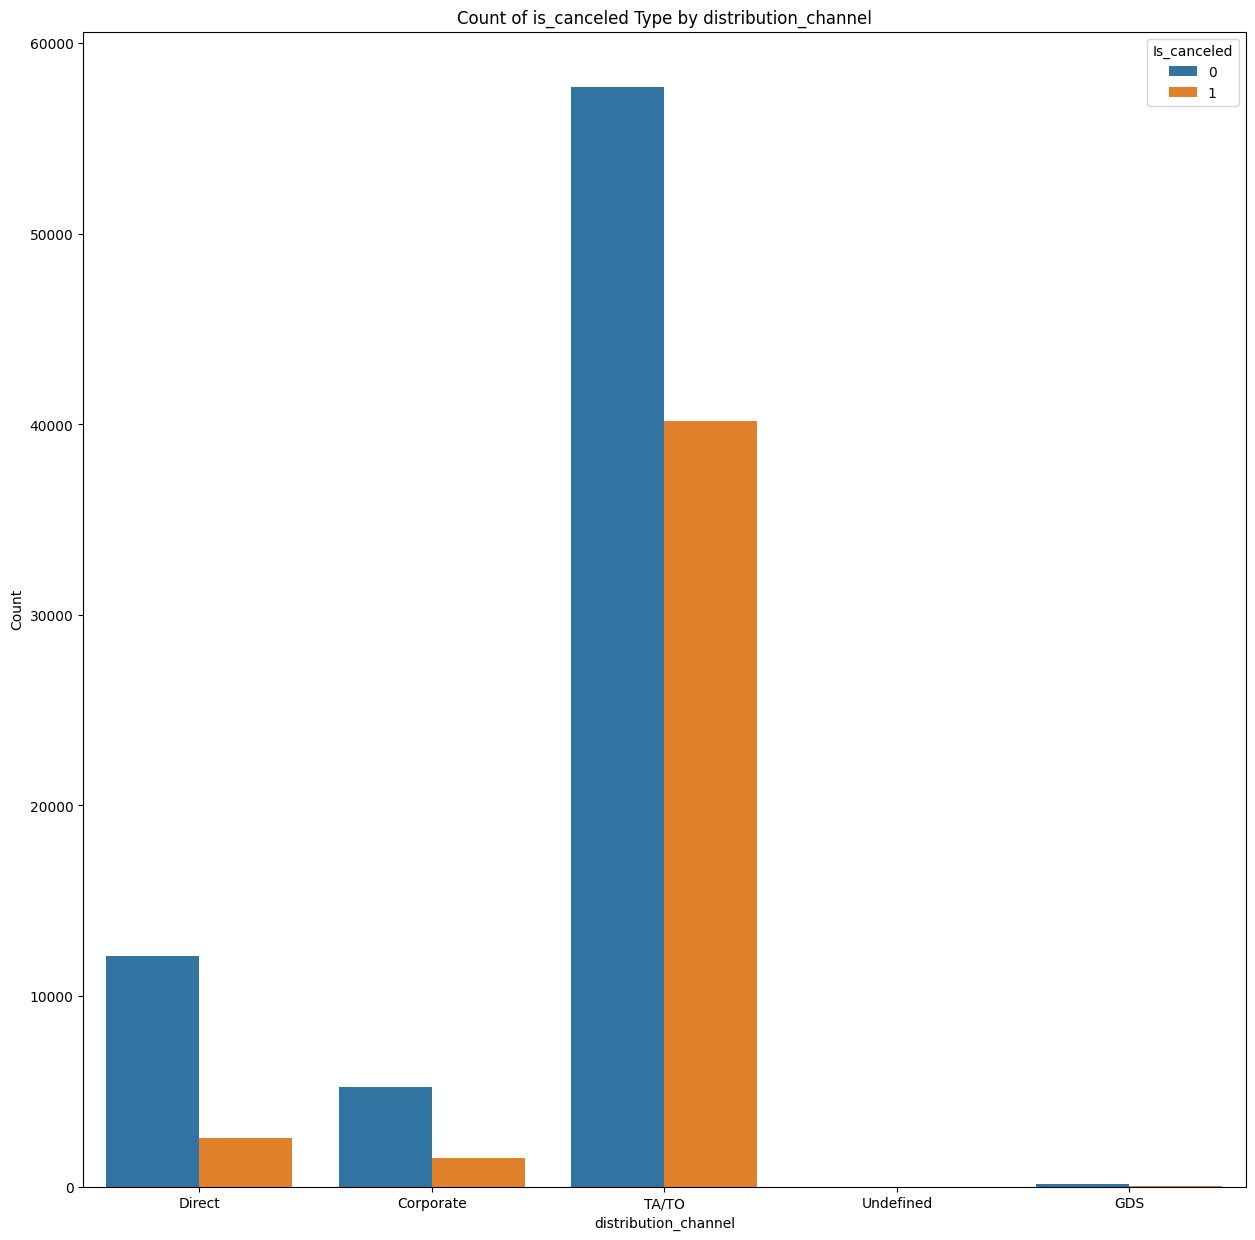

KeyboardInterrupt: 

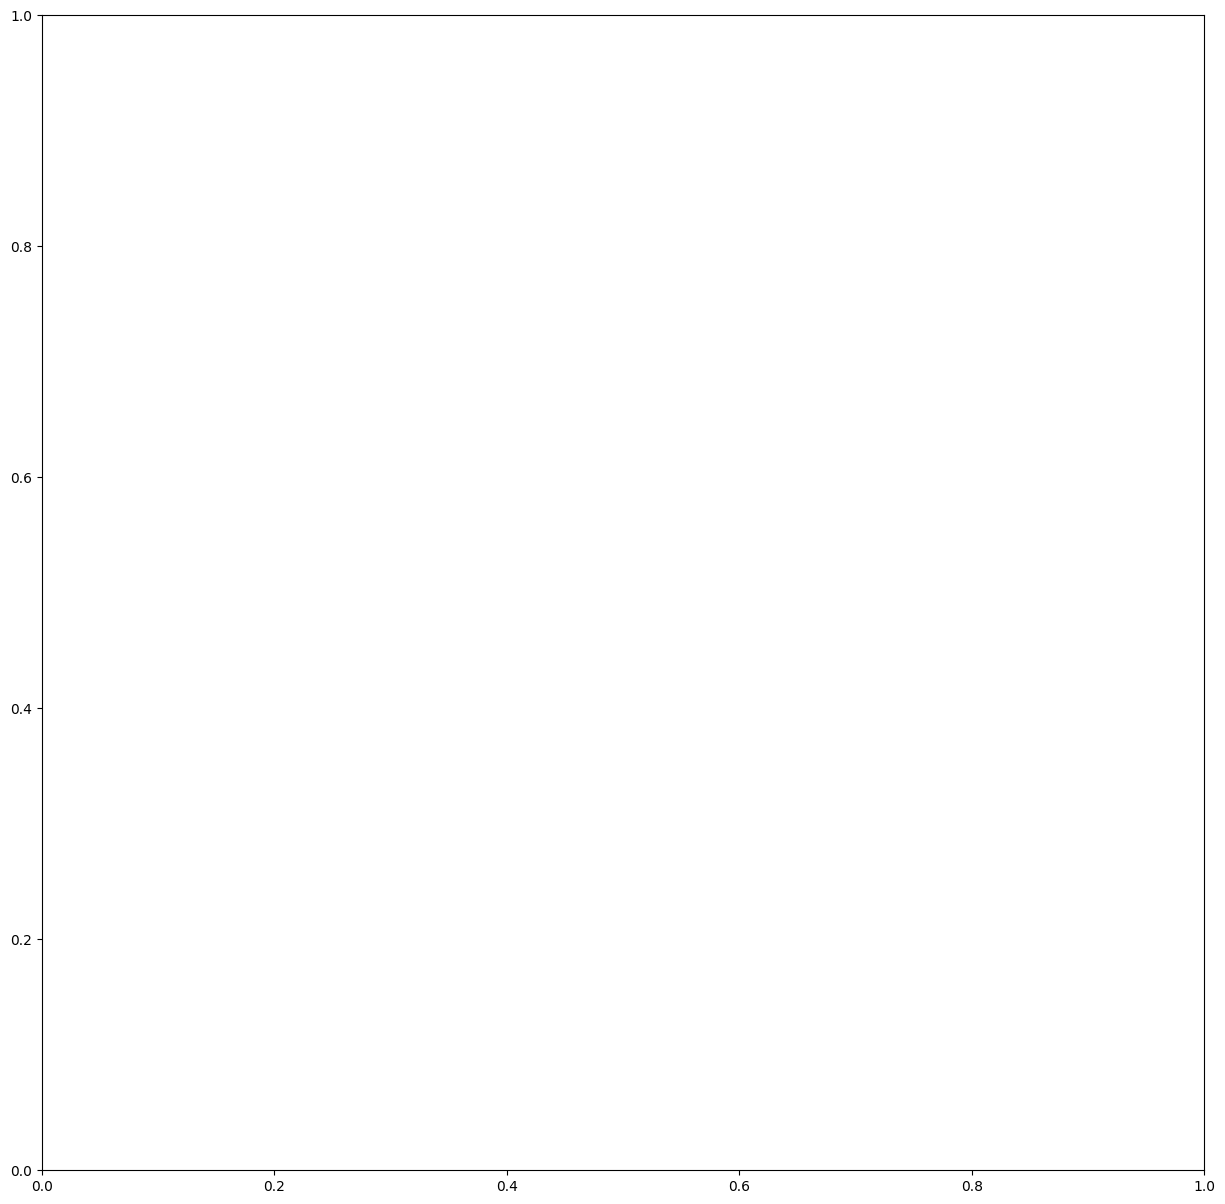

In [19]:

def bivariate_categorical(data, varaible):
    plt.figure(figsize=(15, 15))

    sns.countplot(data=data, x=variable, hue=data['is_canceled'])
    # Add labels and title
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.title('Count of is_canceled Type by 'f'{variable}')
    plt.legend(title='Is_canceled')


    plt.show()

for variable in categorical_columns:
    bivariate_categorical(data, variable)

   


In [8]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            